<a href="https://colab.research.google.com/github/bolps/vdm2020/blob/master/Progetto_VDM_Sport_e_alimentazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Consegna e link utili

**Informazioni sulle variabili e sulla codifica**<br>
Per informazioni sulle variabili e sulla loro codifica consultare il tracciato disponibile
<a href="http://pizzaplanet.epizy.com/vdm/METADATI/AVQ_Tracciato_2018.html"> qui </a>

**Consegna del progetto:**

1. Costruzione del sottoinsieme dei dati che contenga le informazioni assegnate al gruppo;
2. Analisi monovariata e visualizzazione monovariata dei dati del proprio dataset;
3. Analisi bivariata e visualizzazione dei dati piu’ interessanti ai fini degli obiettivi di ricerca;
4. Analisi multivariata e visualizzazione dei dati complessi.

**Link utili** <br>
http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/114-mca-multiple-correspondence-analysis-in-r-essentials/ <br>
http://www.gastonsanchez.com/visually-enforced/how-to/2012/10/13/MCA-in-R/ <br>
https://datascienceplus.com/using-mca-and-variable-clustering-in-r-for-insights-in-customer-attrition/ <br>
https://datascienceplus.com/using-mca-and-variable-clustering-in-r-for-insights-in-customer-attrition/

#### **TODO**
- [ ] Bozza risultati(processo)
- [ ] Fuzzy clustering
- [ ] Bozza commenti multivariata
- [x] Uniformare "abbiamo" e impersonale ...
- [X] Bozza commenti scelte fatte (processo)
- [x] Controllare NA in piechart
- [x] Barchart con frequenze relative
- [x] Aggiungere variabili illustrative su grafico MCA
- [x] Uniformare decimali in barchart
- [x] Aggiustare in tutto il file età 18-34 e non 18-35


Domanda di ricerca
<br>
Dataset e metodi
<br>
Presentazione analisi mono
<br>
Presentazione analisi e risultati bivariate
<br>
Presentazione analisi multivariate e risultati
<br>
Conclusione



#### Abstract

#### Introduzione

L’Organizzazione Mondiale della Sanità (OMS) definisce l’attività fisica come “ogni movimento corporeo prodotto dai muscoli scheletrici che comporti un dispendio energetico - incluse le attività effettuate lavorando, giocando, dedicandosi alle faccende domestiche, viaggiando e impegnandosi in attività ricreative”. A partire da questa definizione, l’OMS fornisce un quadro dettagliato delle implicazioni dell’inattività fisica sulla salute e il benessere degli individui:

L’inattività fisica è uno dei più importanti fattori di rischio di mortalità nel mondo.
L’inattività fisica è un fattore di rischio fondamentale per le malattie non trasmissibili, quali le patologie cardiovascolari, i tumori e il diabete.
L’attività fisica apporta benefici significativi alla salute e contribuisce a prevenire le malattie non trasmissibili.
Nel mondo, un adulto su 4 e più dell’80% degli adolescenti non è sufficientemente attivo.

Lo scenario globale così descritto evidenzia particolari criticità che hanno spinto molti Paesi a programmare politiche di sensibilizzazione rispetto ai benefici dell’attività fisica. 

L’analisi condotta dall’[Eurostat Sport Statistics](https://https://ec.europa.eu/eurostat/documents/4031688/8716412/KS-07-17-123-EN-N.pdf/908e0e7f-a416-48a9-8fb7-d874f4950f57) consente di mettere in luce la situazione del nostro Paese, confrontata con i trend degli Stati membri dell’Unione. 

Di particolare interesse è il dato sulla pratica sportiva nei diversi Paesi dell’Unione: l’Italia si trova al di sotto della media europea, molto distante dagli Stati “guida” che sono perlopiù appartenenti all’Europa centro-settentrionale. Il dato dell’Eurostat fotografa la situazione a livello Paese, riferendosi ai cittadini dai 15 in su e in letteratura sono rinvenibili molti studi che indagano la diffusione dell’attività fisica, concentrandosi sulle fasce di età “estreme”: adolescenti o over 60.

#### Domanda di ricerca e dati di riferimento

L’obiettivo di questa ricerca è di indagare le abitudini sportive in una fascia di popolazione che potremmo definire di “transizione”: quella dei giovani adulti. Il passaggio dall’adolescenza all’età adulta comporta dei cambiamenti significativi sulle abitudini di vita e sulle prospettive sociali ed economiche delle persone. Nello specifico, si vuole condurre un'analisi dettagliata della situazione su base nazionale.
<br><br>
In particolare si vuole indagare il legame tra le abitudini sportive, le risorse economiche e gli indici di salute oggettivi (*Body Mass Index*) e soggettivi (*Salute percepita*) nei 18-34enni residenti in italia (variabili attive), con un focus particolare sull'area geografica e il sesso dei rispondenti (variabili illustrative).
<br><br>
Ai fini dell'analisi sono stati utilizzati i dati relativi all'indagine multiscopo "Aspetti della vita quotidiana" condotta dall'ISTAT nel 2018. Tale indagine è campionaria ed è effettuata su base annua a partire dal 1993; il suo scopo principale è quello di fotografare le principali abitudini e le difficoltà sperimentate dai cittadini in numerosi ambiti (scuola, lavoro, vita familiare, relazioni sociali, legame con il territorio, tempo libero, salute e sport).

#### Installazione librerie

In [ ]:
options(warn=-1)

In [ ]:
# TEMPO DI INSTALLAZIONE STIMATO: 4 MINUTI
list.of.packages <- c("RCurl","readr","ggplot2", "RColorBrewer","graphics","vcd","FactoMineR","factoextra")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘corrplot’, ‘zoo’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘viridis’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘bitops’, ‘lmtest’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggrepel’, ‘abind’, ‘dendextend’, ‘ggpubr’, ‘reshape2’




#### Download e caricamento del dataset

In [ ]:
library(RCurl)
download.file("https://raw.githubusercontent.com/bolps/dataset/master/AVQ_Microdati_2018.txt", "AVQ_Microdati_2018.txt")

In [ ]:
library(readr)
AVQ_Microdati_2018 <- read_delim(
  "AVQ_Microdati_2018.txt",
  "\t",
  escape_double=FALSE,
  na="NA",
  trim_ws=TRUE,
  col_types = cols(
    'REACQ3'=col_double(),'REACQ5'=col_double(),
    'NODELE'=col_double(),'NOSPO6'=col_double(),
    'ORARIS'=col_double(),'NOMED' =col_double(),
    'CONASS'=col_double(),'MALAT' =col_double(),
    'ABBAND'=col_double(),'NONVUO'=col_double()
  )
)

#### Estrazione delle varabili, ricodifica e fix vari


Nell'importare il dataset di riferimento sono state considerate le sole variabili ritenute rilevanti ai fini dello studio, suddivise in tre macro-categorie logiche: variabili socio-demografiche, variabili relative all'attività sportiva/fisica e le variabili target (salute percepita e BMI).
<br><br>
Le unità statistiche sono state filtrate utilizzando la variabile ETAMi, selezionando gli individui appartenenti alle sole fasce di interesse (18-34 anni). Si è così ottenuto un dataset di 7372 unità.
<br><br>
E' stato poi specificato il tipo delle variabili, che nel caso in esame sono tutte qualitative, sconnesse o ordinali; per queste ultime si è inoltre specificato l'ordine. Per tutte le variabili le modalità sono state assegnate sulla base di quanto indicato nel tracciato.

In [ ]:
AVQ18.sport <- AVQ_Microdati_2018[AVQ_Microdati_2018$ETAMi>='007'&AVQ_Microdati_2018$ETAMi<='009',c(
  'ETAMi','SESSO','CITTMi','STCIVMi','ISTRMi','CONDMi','RISEC', 'RIPMF',
  'SPOCON', 'SPOSAL', 'ATTFIS','FREQSPO', #SPOCON, SPOSAL, ATTFIS -> SPORT
  'SALUT','BMI')]

In [ ]:
# Verifico la struttura del dataset selezionato
str(AVQ18.sport)

tibble [7,372 × 14] (S3: tbl_df/tbl/data.frame)
 $ ETAMi  : chr [1:7372] "008" "009" "008" "008" ...
 $ SESSO  : num [1:7372] 1 2 1 2 2 2 1 1 2 2 ...
 $ CITTMi : num [1:7372] 1 1 1 1 1 1 3 1 1 1 ...
 $ STCIVMi: num [1:7372] 1 1 1 1 1 1 1 1 1 1 ...
 $ ISTRMi : chr [1:7372] "07" "01" "07" "01" ...
 $ CONDMi : num [1:7372] 2 1 1 1 1 3 1 1 3 3 ...
 $ RISEC  : num [1:7372] 2 2 2 2 2 3 2 2 3 3 ...
 $ RIPMF  : num [1:7372] 1 1 1 1 1 1 3 3 3 3 ...
 $ SPOCON : num [1:7372] 1 2 2 2 1 1 1 2 1 2 ...
 $ SPOSAL : num [1:7372] 1 NA NA NA 2 1 1 NA 1 NA ...
 $ ATTFIS : num [1:7372] 1 NA NA NA NA 2 3 NA 1 NA ...
 $ FREQSPO: num [1:7372] NA 3 1 2 3 NA NA 4 NA NA ...
 $ SALUT  : num [1:7372] 3 1 2 1 2 3 2 2 2 2 ...
 $ BMI    : num [1:7372] 2 2 2 2 1 2 2 2 2 2 ...


In [ ]:
# Trasformo la tipologia delle variabili in linea con quanto indicato nel tracciato
for (i in 1:length(AVQ18.sport))
  AVQ18.sport[[i]]<-as.factor(AVQ18.sport[[i]])

In [ ]:
# Summary pre ricodifica con etichette in chiaro
summary(AVQ18.sport)

 ETAMi      SESSO    CITTMi   STCIVMi  ISTRMi    CONDMi    RISEC      RIPMF   
 007: 811   1:3716   1:6758   1:5960   01:1595   1:3489   1   :  98   1:1508  
 008:2056   2:3656   3: 428   2:1112   07:4026   2:1353   2   :4345   2:1513  
 009:4505            9: 186   3: 128   09:1518   3:2385   3   :2487   3:1266  
                              9: 172   10:  35   9: 145   4   : 402   4:2307  
                                       99: 198            NA's:  40   5: 770  
                                                                      9:   8  
                                                                              
  SPOCON      SPOSAL      ATTFIS        FREQSPO      SALUT      BMI     
 1   :4615   1   :3527   1   :1528   3      :1343   1   :2091   1: 518  
 2   :2740   2   :1074   2   : 883   2      :1082   2   :4682   2:4941  
 NA's:  17   NA's:2771   3   : 524   4      : 539   3   : 408   3:1574  
                         4   : 532   5      : 339   4   :  88   4: 339  
   

Come si può evincere dal summary sopra riportato alcune modalità di determinate classi hanno una numerosità particolarmente ridotta (n<100). In questi casi si è valutata la possibilità di accorpare più modalità secondo un criterio logico, onde evitare eccessiva frammentazione in sede di analisi bivariata. In dettaglio:
*   ISTRMi (livello di istruzione), la modalità 10 (licenza elementare/nessun titolo)  è stata accorpata alla modalità 09 (licenza media) sulla base dell'elevata scolarizzazione in Italia delle fasce d'età considerate.
*   SALUT (soddisfazione percepita per la propria salute), la modalità 4 (per niente) è stata accorpata alla modalità 3 (poco) in considerazione della scarsa propensione delle fasce d'età interessate a definire come negative le proprie condizioni di salute percepita.
*   RISEC (adeguatezza delle risorse economiche complessive della famiglia), in questo caso è stato deciso di **non accorpare** la pur poco frequente modalità 1 (ottime risorse economiche) alla modalità 2 (adeguate risorse economiche) in virtù della sostanziale differenza che sussiste tra le due.

Nel caso della variabile FREQSPO (frequenza nell'anno delle attività sportive praticate) non solo è stato effettuato un accorpamento di modalità ma anche una ricodifica delle risultanti. L'accorpamento ha avuto una duplice motivazione: 
*   La variabile FREQSPO è valorizzata dai soli sportivi (siano essi saltuari o continuativi), pertanto la numerosità di unità statistiche per questa variabile è pressochè dimezzata rispetto al dataset considerato.
*   La variabile  presentava un'eccessiva granularità del dato a livello logico
<br>

Nel dettaglio lo schema applicato è stato il seguente:
*   FREQSPO:"cinque o più volte a settimana" -> FREQSPO:"alta"
*   FREQSPO:"tre o quattro volte a settimana" -> FREQSPO:"alta"
*   FREQSPO:"due volte a settimana" -> FREQSPO:"media"
*   FREQSPO:"una volta a settimana" -> FREQSPO:"media"
*   FREQSPO:"due o tre volte al mese" -> FREQSPO:"bassa"
*   FREQSPO:"una volta al mese" -> FREQSPO:"bassa"
*   FREQSPO:"qualche volta durante l'anno" -> FREQSPO:"bassa"




In [ ]:
# Assegno l'etichetta corrispondente ai livelli delle variabili
# Per uniformare il dataset l'opzione 'non disponibile' è stata ricodificata come NA

levels(AVQ18.sport$ETAMi) <- c(
    "18-19 anni", 
    "20-24 anni", 
    "25-34 anni"
)
AVQ18.sport$ETAMi<-factor(AVQ18.sport$ETAMi, order=TRUE, levels=c(
  "18-19 anni", 
  "20-24 anni",
  "25-34 anni")
)

levels(AVQ18.sport$SESSO) <- c(
    "maschio",
    "femmina"
)

levels(AVQ18.sport$CITTMi) <- c(
    "italiana",
    "straniera",
    NA
)

levels(AVQ18.sport$STCIVMi) <- c(
    "celibe/nubile",
    "coniugato/unito civilmente",
    "separato/divorziato",
    NA
)

levels(AVQ18.sport$ISTRMi) <- c(
    "laurea e post-laurea"
    ,"diploma"
    ,"scuola media/elementare/nessuno"
    ,"scuola media/elementare/nessuno",
    NA
)
AVQ18.sport$ISTRMi<-factor(AVQ18.sport$ISTRMi, order=TRUE, levels=c(
  "scuola media/elementare/nessuno",
  "diploma",
  "laurea e post-laurea")
)

levels(AVQ18.sport$CONDMi) <- c(
    "occupato",
    "in cerca di occupazione",
    "inattivo; altra condizione",
    NA
)

levels(AVQ18.sport$RISEC) <- c(
    "ottime",
    "adeguate",
    "scarse",
    "assolutamente insufficienti"
)
AVQ18.sport$RISEC<-factor(AVQ18.sport$RISEC, order=TRUE, levels=c(
  "assolutamente insufficienti",
  "scarse",
  "adeguate",
  "ottime")
)

levels(AVQ18.sport$RIPMF) <- c(
    "Nord-ovest",
    "Nord-est",
    "Centro",
    "Sud",
    "Isole",
    NA
)

for (i in c("SPOCON", "SPOSAL"))
    levels(AVQ18.sport[[i]])<- c(
      "no", 
      "si"
    )

levels(AVQ18.sport$ATTFIS) <- c(
    "no",
    "si, una o più volte a settimana",
    "si, una o più volte al mese",
    "si, più raramente"
)

levels(AVQ18.sport$FREQSPO) <- c(
    "alta",
    "alta",
    "media",
    "media",
    "bassa",
    "bassa",
    "bassa"
)
AVQ18.sport$FREQSPO<-factor(AVQ18.sport$FREQSPO, order=TRUE, levels=c(
  "bassa", 
  "media",
  "alta")
)

levels(AVQ18.sport$SALUT) <- c(
    "molto", 
    "abbastanza", 
    "poco/per niente", 
    "poco/per niente"
)
AVQ18.sport$SALUT<-factor(AVQ18.sport$SALUT, order=TRUE, levels=c(
  "poco/per niente", 
  "abbastanza",
  "molto")
)

levels(AVQ18.sport$BMI) <- c(
    "sottopeso", 
    "normopeso", 
    "sovrappeso", 
    "obeso"
)
AVQ18.sport$BMI<-factor(AVQ18.sport$BMI, order=TRUE, levels=c(
  "sottopeso", 
  "normopeso",
  "sovrappeso", 
  "obeso")
)

Particolare menzione merita la costruzione della nuova variabile SPORT a partire dalle tre variabili originali SPOCON, SPOSAL, ATTFIS.
<br><br>
Da disegno di indagine la domanda del questionario relativa alla pratica di sport continuativo (SPOCON) è stata sottoposta a tutte le unità statistiche considerate, mentre le due successive domande (SPOSAL, pratica sportiva saltuaria e ATTFIS, attività fisica generica) sono state sottoposte solamente agli individui che avevano risposto negativamente alla domanda immediatamente precedente. Pertanto ai soli 4615 rispondenti "no" a SPOCON è stata sottoposta SPOSAL e, a cascata, ai soli 3527 rispondenti "no" anche a SPOSAL è stata sottoposta ATTFIS.
<br><br>
E' stato quindi deciso di sintetizzare questa informazione frazionata in un'unica variabile valorizzata per tutte le unità statistiche (al netto degli NA). Lo schema applicato è stato il seguente:
*   SPOCON:"si" -> SPORT:"sport continuativo"
*   SPOCON:"no" e SPOSAL:"si" -> SPORT:"sport saltuario"
*   SPOCON:"no" e SPOSAL:"no" e ATTFIS:"si, una o più volte a settimana" -> SPORT:"attività fisica continuativa"
*   SPOCON:"no" e SPOSAL:"no" e ATTFIS:"si, una o più volte al mese" -> SPORT:"attività fisica saltuaria"
*   SPOCON:"no" e SPOSAL:"no" e ATTFIS:"si, più raramente" -> SPORT:"attività fisica saltuaria"
*   SPOCON:"no" e SPOSAL:"no" e ATTFIS:"no" -> SPORT:"nessuna attività"





In [ ]:
AVQ18.sport$SPORT <- ifelse(AVQ18.sport$SPOCON=="si", "sport continuativo", 
                             ifelse(AVQ18.sport$SPOSAL=="si", "sport saltuario", 
                               ifelse(AVQ18.sport$ATTFIS=="si, una o più volte a settimana", "attività fisica continuativa",
                                 ifelse(AVQ18.sport$ATTFIS=="si, una o più volte al mese" | AVQ18.sport$ATTFIS=="si, più raramente", "attività fisica saltuaria", 
                                    ifelse(AVQ18.sport$ATTFIS=="no", "nessuna attività", NA)))))
                                    
AVQ18.sport$SPORT <- as.factor(AVQ18.sport$SPORT)
AVQ18.sport$SPORT<-factor(AVQ18.sport$SPORT, order=TRUE, levels=c("nessuna attività", "attività fisica saltuaria", "attività fisica continuativa","sport saltuario","sport continuativo"))

In [ ]:
AVQ18.sport <- AVQ18.sport[,c(
  'ETAMi','SESSO','CITTMi','STCIVMi','ISTRMi','CONDMi','RISEC', 'RIPMF',
  'SPORT','FREQSPO',
  'SALUT','BMI')]

In [ ]:
# Visualizzo la struttura del dataset per verificare le modifiche applicate
str(AVQ18.sport)

tibble [7,372 × 12] (S3: tbl_df/tbl/data.frame)
 $ ETAMi  : Ord.factor w/ 3 levels "18-19 anni"<"20-24 anni"<..: 2 3 2 2 3 1 2 3 3 3 ...
 $ SESSO  : Factor w/ 2 levels "maschio","femmina": 1 2 1 2 2 2 1 1 2 2 ...
 $ CITTMi : Factor w/ 2 levels "italiana","straniera": 1 1 1 1 1 1 2 1 1 1 ...
 $ STCIVMi: Factor w/ 3 levels "celibe/nubile",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ISTRMi : Ord.factor w/ 3 levels "scuola media/elementare/nessuno"<..: 2 3 2 3 3 2 2 3 2 2 ...
 $ CONDMi : Factor w/ 3 levels "occupato","in cerca di occupazione",..: 2 1 1 1 1 3 1 1 3 3 ...
 $ RISEC  : Ord.factor w/ 4 levels "assolutamente insufficienti"<..: 3 3 3 3 3 2 3 3 2 2 ...
 $ RIPMF  : Factor w/ 5 levels "Nord-ovest","Nord-est",..: 1 1 1 1 1 1 3 3 3 3 ...
 $ SPORT  : Ord.factor w/ 5 levels "nessuna attività"<..: 1 5 5 5 4 3 2 5 1 5 ...
 $ FREQSPO: Ord.factor w/ 3 levels "bassa"<"media"<..: NA 2 3 3 2 NA NA 2 NA NA ...
 $ SALUT  : Ord.factor w/ 3 levels "poco/per niente"<..: 1 3 2 3 2 1 2 2 2 2 ...
 $ BMI    : Ord.f

#### Analisi monovariata // Summary per macrocategoria di variabili

In questa sezione si illustra la composizione delle variabili illustrative e attive del dataset creato







In [ ]:
# Visualizzo summary delle variabili socio-demografiche
summary(AVQ18.sport[,c('ETAMi','SESSO','CITTMi','STCIVMi','ISTRMi','CONDMi','RISEC', 'RIPMF')])

        ETAMi          SESSO            CITTMi    
 18-19 anni: 811   maschio:3716   italiana :6758  
 20-24 anni:2056   femmina:3656   straniera: 428  
 25-34 anni:4505                  NA's     : 186  
                                                  
                                                  
                                                  
                       STCIVMi                                 ISTRMi    
 celibe/nubile             :5960   scuola media/elementare/nessuno:1553  
 coniugato/unito civilmente:1112   diploma                        :4026  
 separato/divorziato       : 128   laurea e post-laurea           :1595  
 NA's                      : 172   NA's                           : 198  
                                                                         
                                                                         
                        CONDMi                             RISEC     
 occupato                  :3489   assolutamente insuff

In [ ]:
# Visualizzo il summary delle variabili relative allo sport e all'attività fisica
summary(AVQ18.sport[,c('SPORT','FREQSPO')])

                          SPORT       FREQSPO    
 nessuna attività            :1528   bassa: 564  
 attività fisica saltuaria   :1056   media:1882  
 attività fisica continuativa: 883   alta :1364  
 sport saltuario             :1074   NA's :3562  
 sport continuativo          :2740               
 NA's                        :  91               

In [ ]:
# Visualizzo il summary relativo a BMI, stato di salute percepita e soddisfazione per il tempo libero
summary(AVQ18.sport[,c('SALUT','BMI')])

             SALUT              BMI      
 poco/per niente: 496   sottopeso : 518  
 abbastanza     :4682   normopeso :4941  
 molto          :2091   sovrappeso:1574  
 NA's           : 103   obeso     : 339  

#### Analisi monovariata // Variabili socio-demografiche



In prima battuta è stata svolta un'analisi monovariata sulle variabili socio-demografiche cosi da avere una conoscenza generale delle caratteristiche del dataset in esame.

In [ ]:
library(RColorBrewer)
library(ggplot2)
library(grid)

In [ ]:
# Definisco funzione per pie chart
pc <- function(df, title, palname, ncol, rev=c('TRUE','FALSE')){
  pct<-round(table(na.omit(df))/length(na.omit(df))*100, 2)
  lbls<-levels(df)
  lbls2<-paste(lbls, " ",pct, "%", sep="")
  if(rev==FALSE){
    pie(pct, labels=lbls2, main=title, border="white", col=brewer.pal(ncol, palname))}
    else{
      pie(pct, labels=lbls2, main=title, border="white", col=rev(brewer.pal(ncol, palname)))
    }
}

# Definisco funzione per barchart
bc <- function(df, title, subtitle, palname, direct=c(-1,1)){
  data <- data.frame("class" = levels(df),"values" =as.vector(round((table(df)/sum(table(df))*100),2)))
  data$class <- factor(data$class, levels = data[["class"]])
  ggplot(data, aes(x=class, y=values, fill=class))+
  geom_bar(stat="identity")+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1),panel.grid=element_blank(),panel.border = element_blank(),axis.line = element_line(colour = "black"))+
  labs(title = title, subtitle = subtitle, y = "frequenza relativa (%)", x="", fill = "")+
  scale_fill_brewer(palette=palname, direction=direct)+
  geom_text(aes(label=sprintf("%0.2f", values)), position=position_dodge(width=0.9), vjust=-0.25)
}

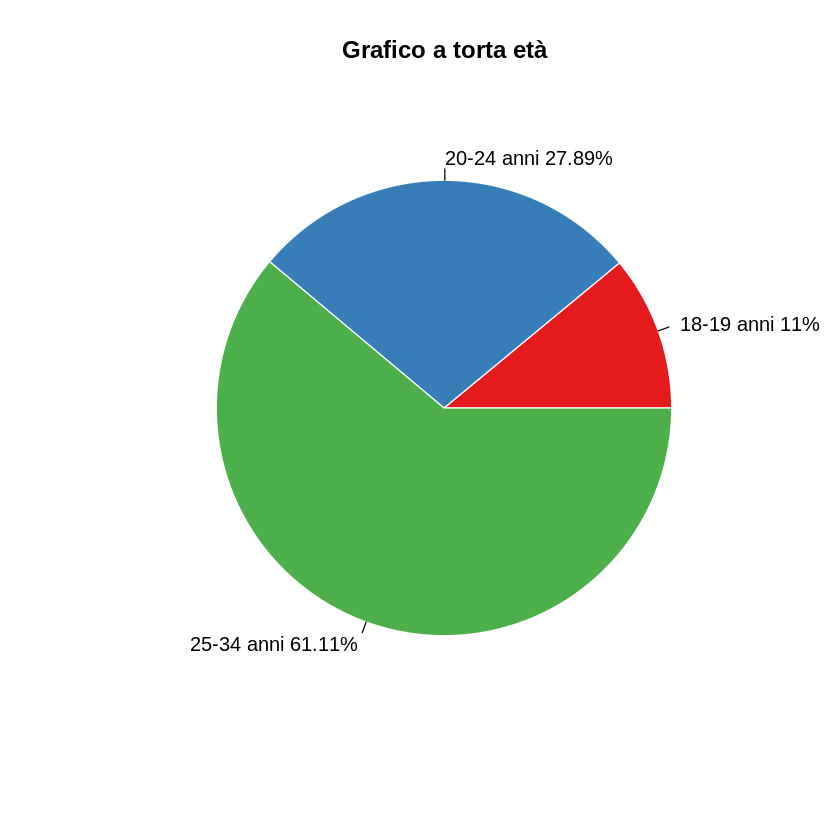

In [ ]:
pc(AVQ18.sport$ETAMi,"Grafico a torta età","Set1",3,FALSE)

Come mostrato dal grafico la fascia d'età più rappresentata è quella tra 25 e 34 anni (61,11%), seguita dalla fascia 20-24 anni (27,89%) e da quella 18-19 anni (11%). La distribuzione è specchio della ampiezza delle classi scelta da ISTAT presumibilmente secondo criteri di omogeneità di stili di vita.

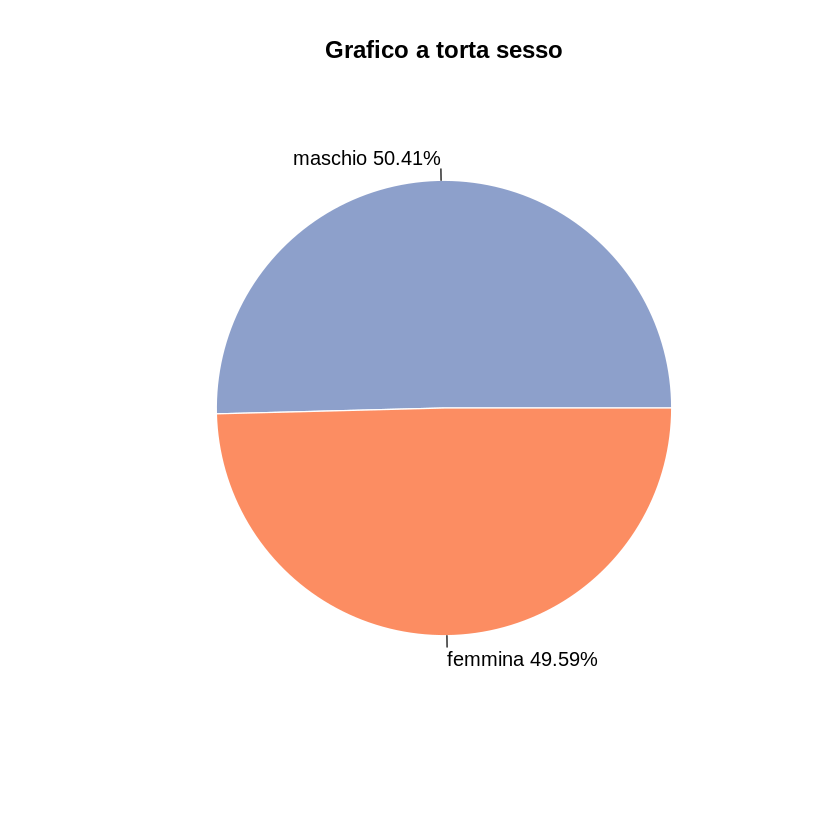

In [ ]:
pc(AVQ18.sport$SESSO,"Grafico a torta sesso","Set2",3,TRUE)

Il dataset è pressoché equamente distribuito per i sessi (maschi 50,41%, femmine 49,49%).

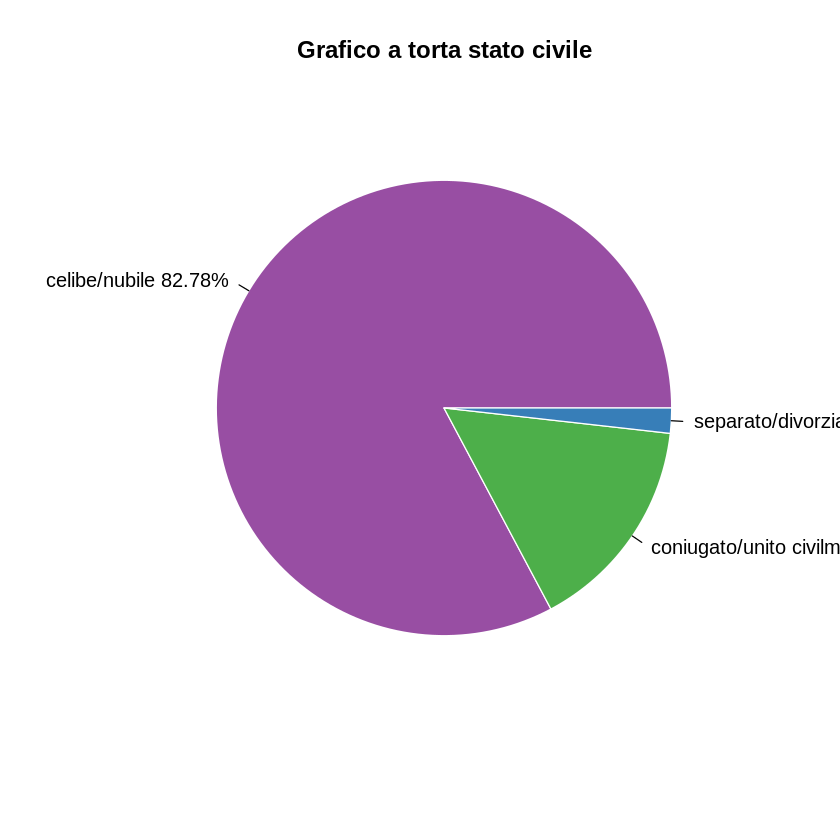

In [ ]:
pc(AVQ18.sport$STCIVMi,"Grafico a torta stato civile","Set1",4,TRUE)

La maggior parte dei rispondenti ha dichiarato di essere celibe/nubile (82,78%), una parte minoritaria ma comunque consistente ha dichiarato di essere coniugato/unito civilmente (15,44%) e solo una piccola parte ha dichiarato di essere separato/divorziato (1,78%).

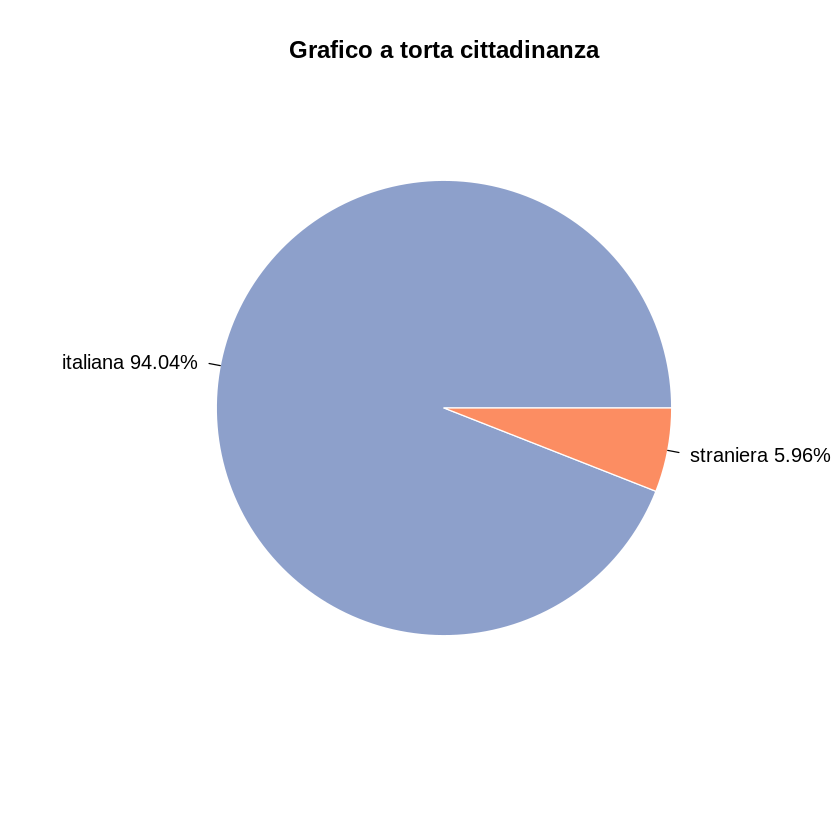

In [ ]:
pc(AVQ18.sport$CITTMi,"Grafico a torta cittadinanza","Set2",3,TRUE)

Tra gli intervistati che dichiarano la propria cittadinanza (7186 su 7372) il 94,04% dichiara di avere la cittadinanza italiana, contro il 5,96% che dichiara una cittadinanza straniera.

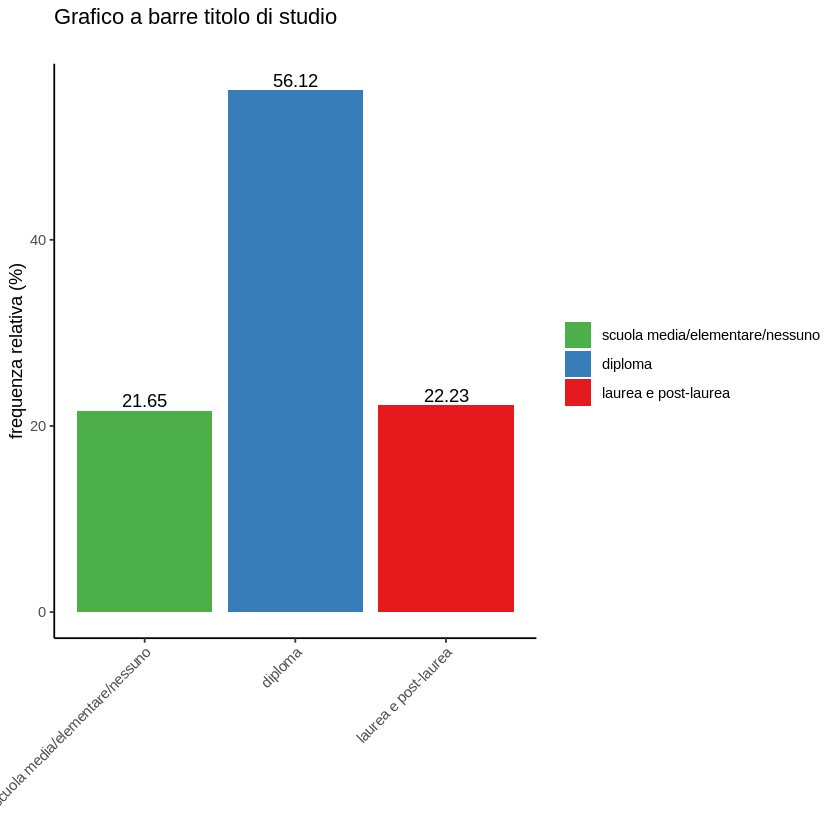

In [ ]:
bc(AVQ18.sport$ISTRMi,"Grafico a barre titolo di studio","","Set1",-1)

Oltre la metà degli invididui che hanno indicato il titolo di studio dichiara di essere in possesso del diploma di scuola secondaria di secondo grado; i rimanenti si distribuiscono per metà tra i laureati e per metà tra coloro che non hanno conseguito titoli superiori a quelli del primo ciclo (licenza media, licenza elementare). Per completezza d'informazione è bene aggiungere che oltre la metà degli intervistati tra 18-19 anni (452 su 811) non ha ancora concluso la scuola secondaria di secondo grado, presumibilmente per limiti anagrafici.

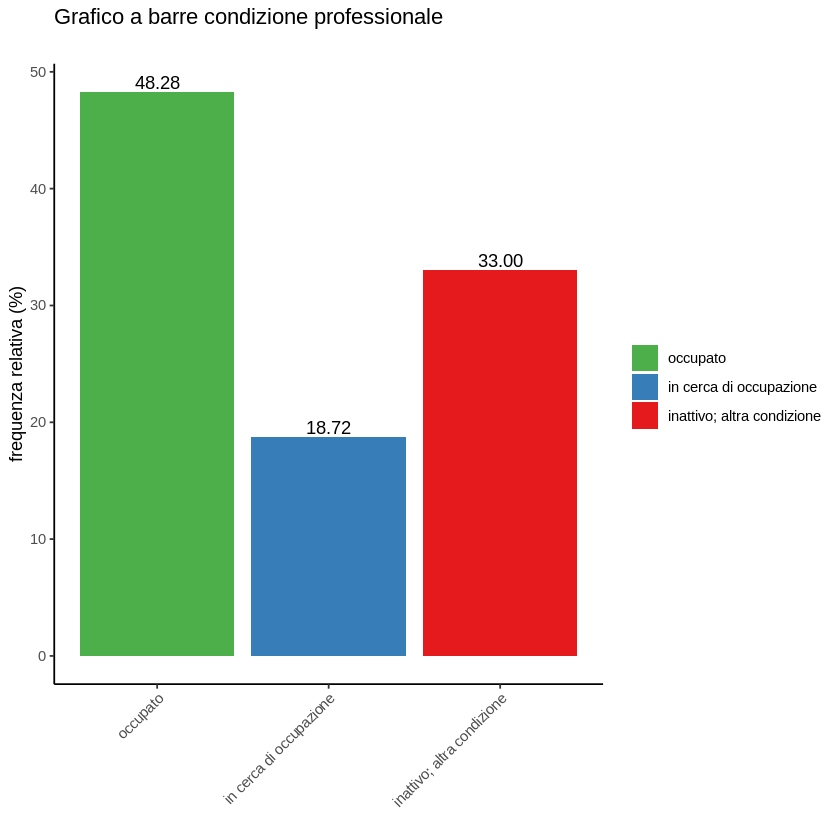

In [ ]:
bc(AVQ18.sport$CONDMi,"Grafico a barre condizione professionale","","Set1",-1)

Tra gli intervistati che hanno dichiarato la loro condizione professionale circa la metà (48,28%) ha un'occupazione, il 18,72% di essere in cerca di un'occupazione e il restante 33% è inattivo o in altra condizione (per esempio studente).

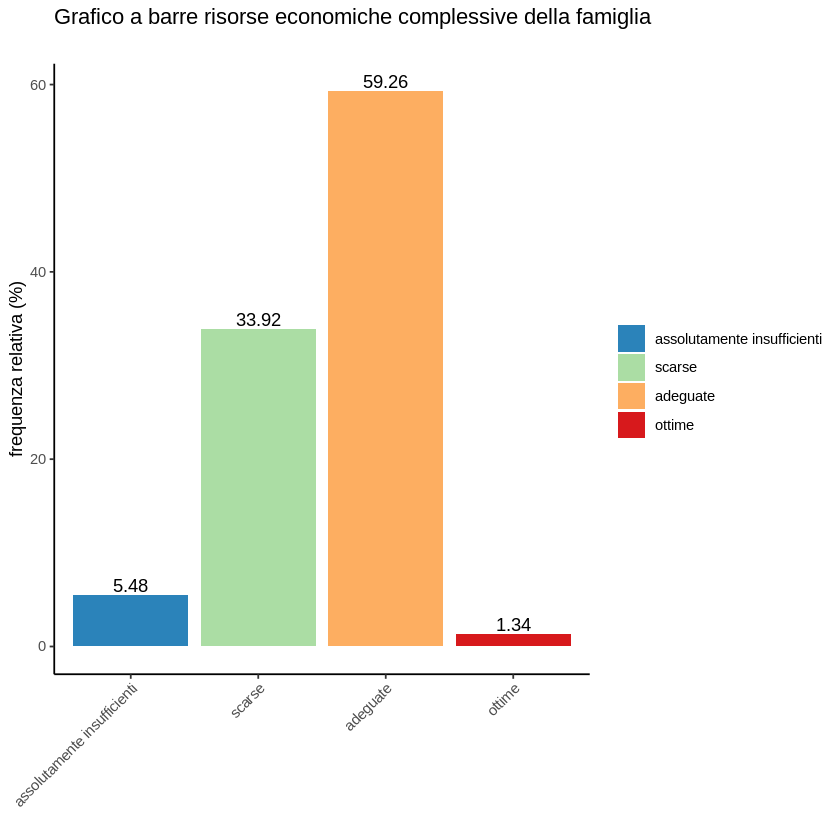

In [ ]:
bc(AVQ18.sport$RISEC,"Grafico a barre risorse economiche complessive della famiglia","","Spectral",-1)

La variabile considerata come indicatore della situazione economica (RISEC) è una misura dell'adeguatezza percepita dall'individuo circa le risorse economiche della famiglia di appartenenza. La netta maggioranza dei rispondenti (59,26%) dichiara le risorse come adeguate, un terzo del totale (33,92%) le dichiara scarse, mentre la marginale quota residua si colloca sugli estremi (5,48% assolutamente insufficienti, 1,34% ottime)    

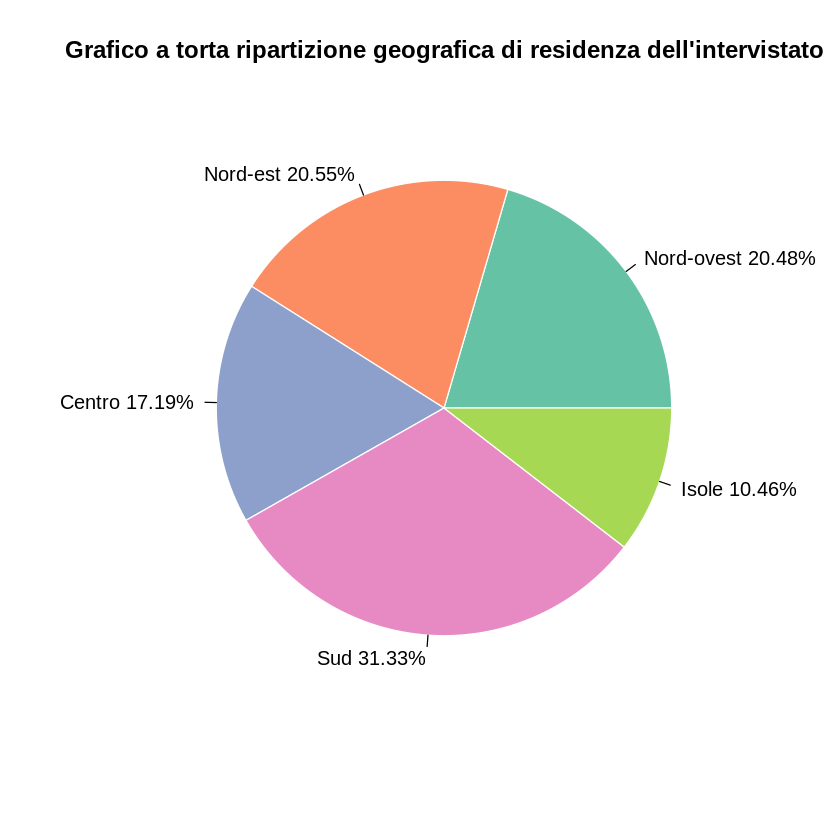

In [ ]:
pc(AVQ18.sport$RIPMF,"Grafico a torta ripartizione geografica di residenza dell'intervistato","Set2",6,FALSE)

Il grafico mostra una parziale corrispondenza con la distribuzione della popolazione italiana nelle macroregioni identificate. E' da sottolineare che il dato riguarda la residenza dell'intervistato e non l'effettivo domicilio che soprattutto in questa fascia d'età potrebbero non coincidere.

#### Analisi monovariata // Variabili sport e attività fisica

Segue un focus sulle variabili relative alle abitudini sportive.

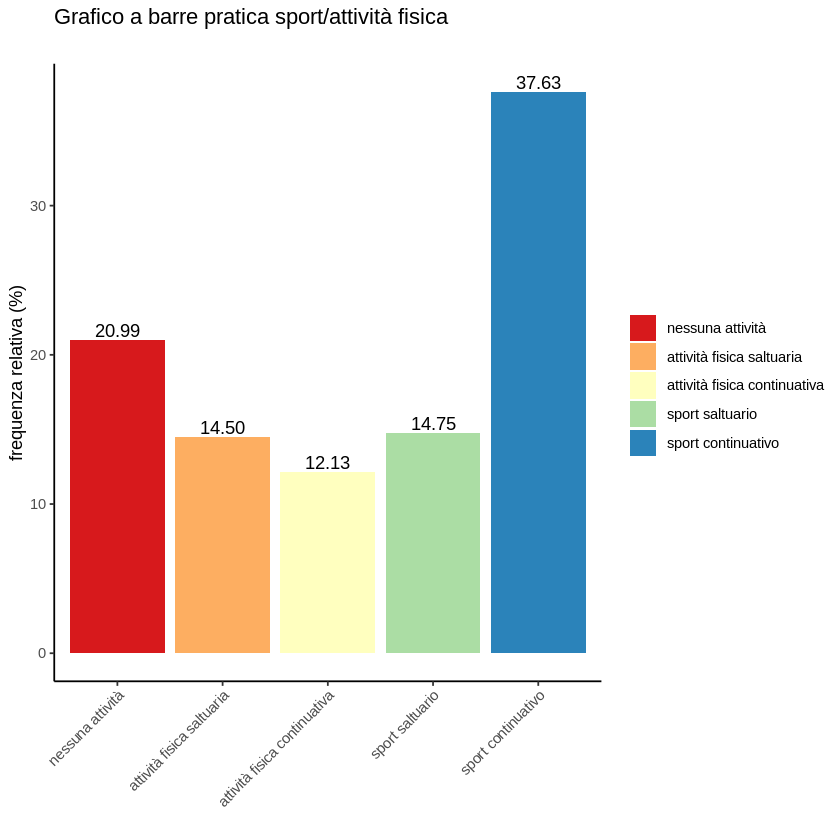

In [ ]:
bc(AVQ18.sport$SPORT,"Grafico a barre pratica sport/attività fisica","","Spectral",1)

La variabile SPORT, sintetizzata a partire da SPOCON, SPOSAL e ATTFIS, classifica i rispondenti tra chi fa sport continuativamente (37,63%) o saltuariamente (14,75%), chi fa una qualche forma di attività fisica continuativa (12,13%) o saltuaria (14,5%) e infine chi dichiara di non fare alcuna attività fisica o sportiva (20,99%). 
<br><br>
Pertanto, oltre un quinto dei giovani adulti intervistati non fa alcuna attivtà fisica o sportiva

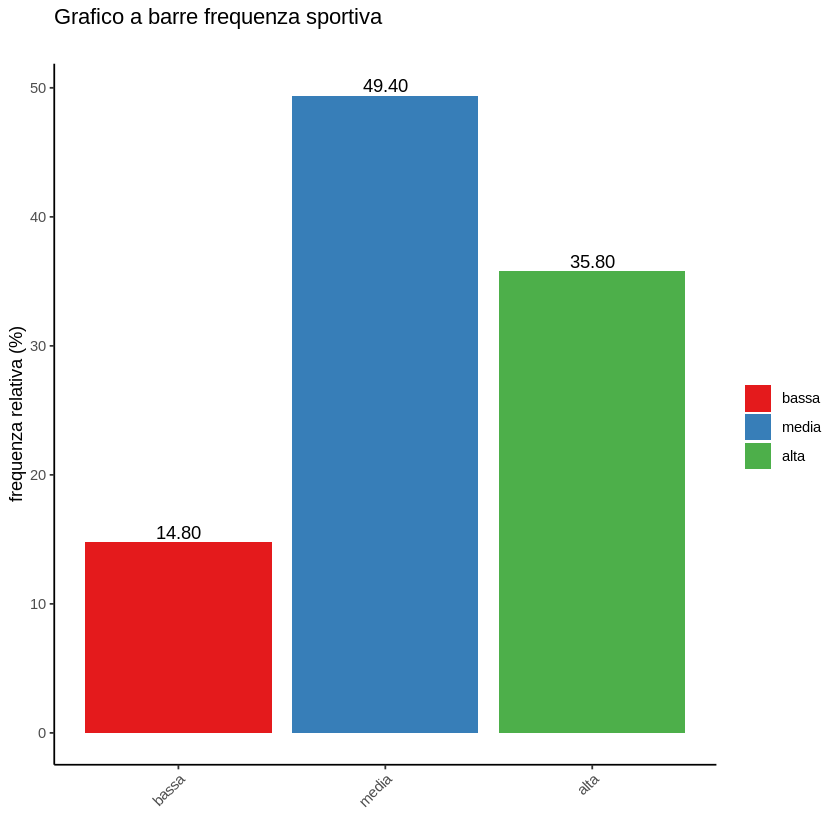

In [ ]:
bc(AVQ18.sport$FREQSPO,"Grafico a barre frequenza sportiva","","Set1",1)

Tra quanti hanno dichiarato di fare sport continuativamente o saltuariamente, la frequenza di tale pratica si rivela media (1-2 volte a settimana) nella metà dei casi, alta (almeno 3 volte a settimana) nel 35.8% dei casi e bassa (meno di una volta a settimana) nel restante 14,8% dei casi.

#### Analisi monovariata // Variabili salute percepita e BMI

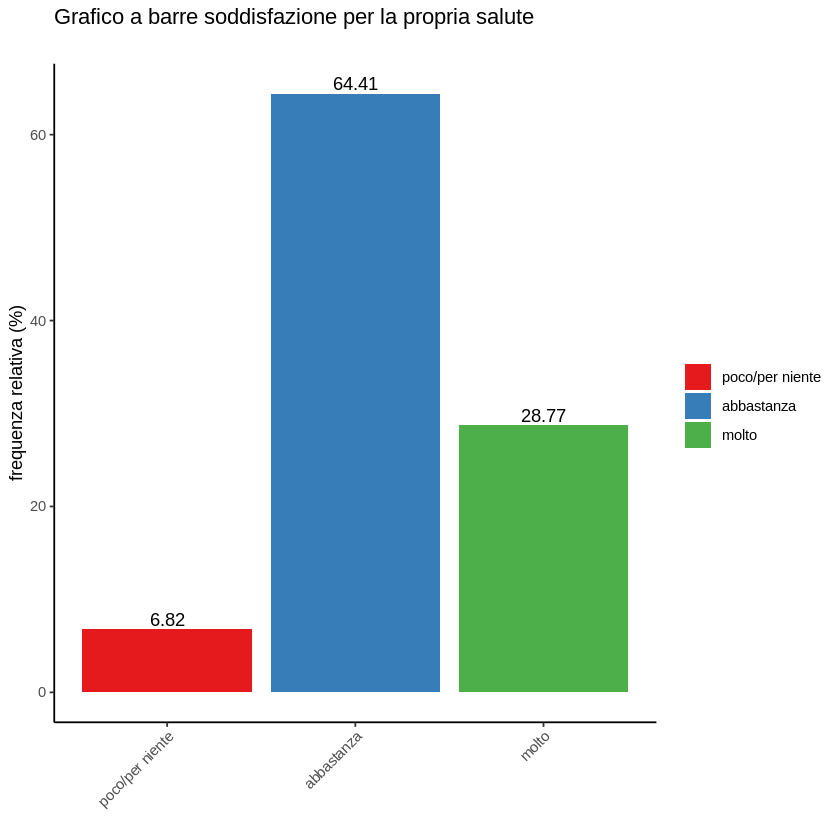

In [ ]:
bc(AVQ18.sport$SALUT,"Grafico a barre soddisfazione per la propria salute","","Set1",1)

Per quanto riguarda SALUT, la variabile che misura lo stato di salute percepito dagli intervistati, i rispondenti si distribuiscono principalmente sulle modalità "abbastanza soddisfatto" (64,41%) e "molto soddisfatto" (28,77%), mentre solo il 6.82% ha dichiarato di sentirsi poco o per niente in salute (modalità accorpata precedentemente). Si può dire che nelle fasce d'età considerate la netta maggioranza delle persone tende a sentirsi in salute.

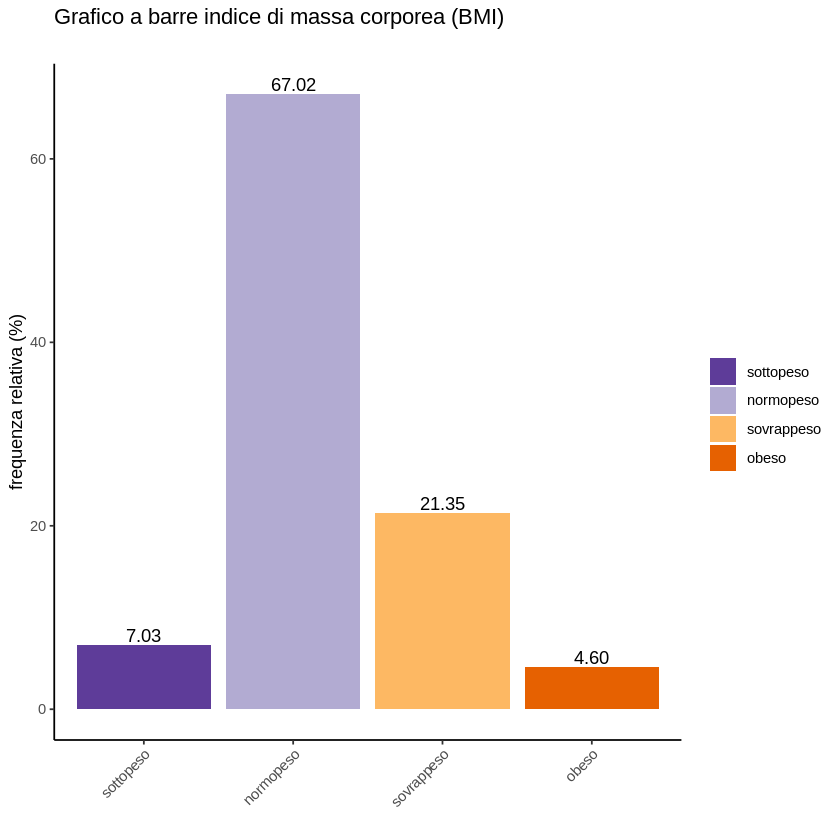

In [ ]:
bc(AVQ18.sport$BMI,"Grafico a barre indice di massa corporea (BMI)","","PuOr",-1)

Nonostante la distribuzione della variabile BMI mostri una prevalenza di persone normopeso (i due terzi del totale) è possibile apprezzare una percentuale consistente di persone sovrappeso (21,35%) o obese (4,6%), inoltre il 7% del dataset è risultato sottopeso. 

#### Analisi Bivariata

L'analisi bivariata evidenzia se vi sono eventuali associazioni o una qualche relazione tra due o più distinte variabili. 

In prima battuta sono state analizzate le associazioni tra le variabili socio-economiche incluse nel dataset per fornire una base del contesto di riferimento.

In secondo luogo è stata approfondita l'associazione della nuova varibile SPORT con le altre variabili oggetto di studio. Per quanto riguarda le analisi sulla frequenza sportiva è necessario ricordare che a tale domanda hanno risposto solo gli individui che hanno dichiarato di praticare sport continuativo o saltuario. Il dato quindi fornisce un approfondimento sulle loro abitudini sportive.

Successivamente sono stati sviluppati dei focus relativi a risorse economiche, livello di istruzione e ripartizione geografica degli intervistati.

Infine è stato fatto un affondo sulle differenze legate all'attività sportiva e al sesso degli intervistati in relazione a BMI, risorse economiche e salute percepita.


#### Bivariata // Focus relazione tra variabili socio-economiche

Nell'analisi delle variabili socio-economiche si osserva un quadro noto: per quanto riguarda la relazione tra ripartizione geografica e risorse economiche emerge che il Nord e il Centro hanno un'associazione positiva con tale variabile, mentre per il Sud e le Isole l'associazione è negativa.

Una situazione simile si osserva anche per la relazione tra livello di istruzione e risorse economiche: la disponibilità di risorse economiche è associata positivamente ai livelli di istruzione più alti, al contrario la scarsità di risorse economiche ha un legame con i livelli di istruzione più bassi.

In [ ]:
library("vcd")

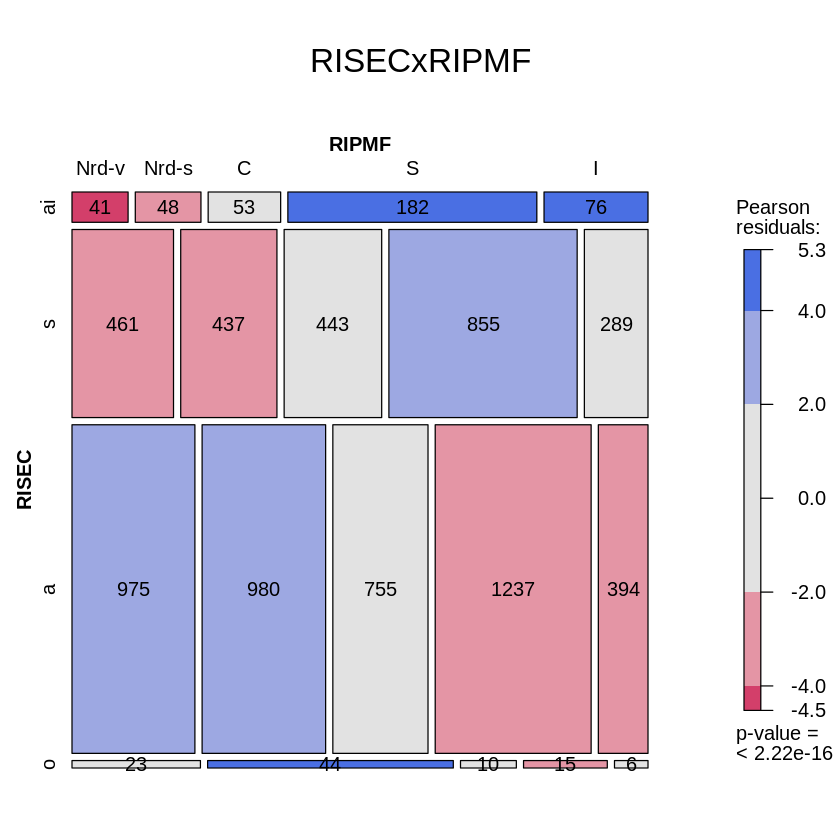

In [ ]:
mosaic(~ RISEC + RIPMF, data = AVQ18.sport, main = "RISECxRIPMF", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

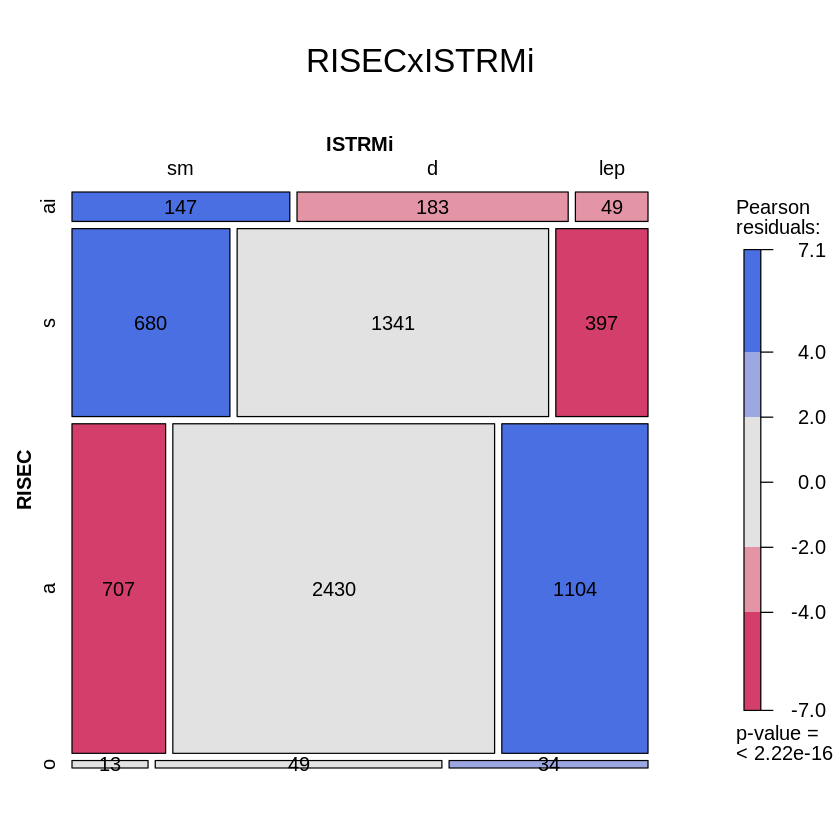

In [ ]:
mosaic(~ RISEC + ISTRMi, data = AVQ18.sport, main = "RISECxISTRMi", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

#### Bivariata // Focus Sport

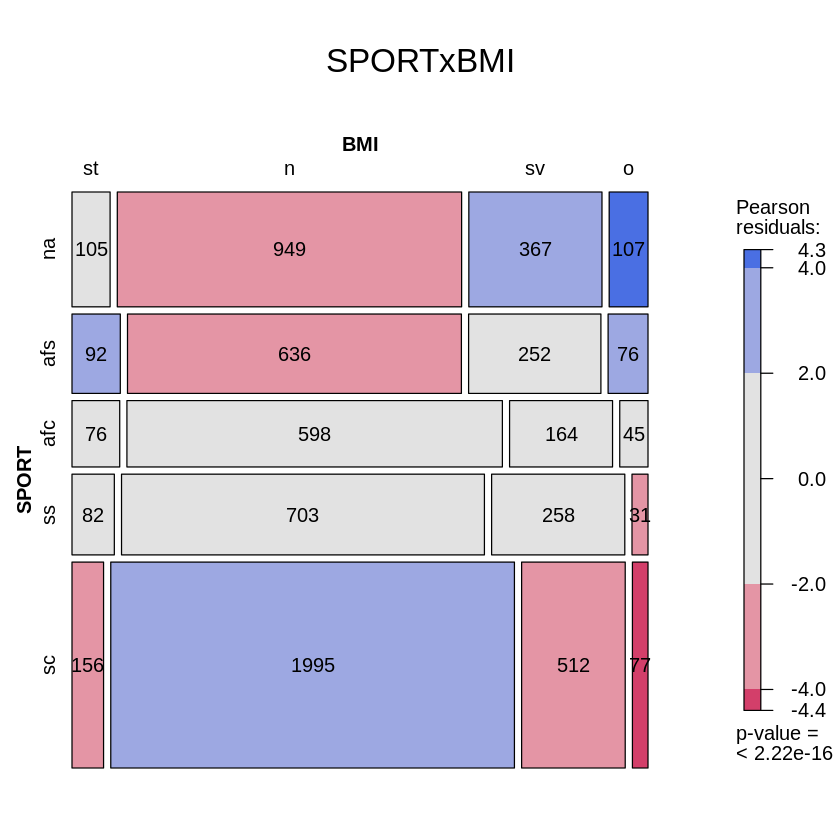

In [ ]:
mosaic(~ SPORT + BMI, data = AVQ18.sport, main = "SPORTxBMI", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

Mettendo in relazione SPORT con il BMI, emerge un'associazione tra le due variabili. Nello specifico si osserva un'associazione positiva marcata tra gli individui che non fanno nessuna attività fisica e l'obesità. Allo stesso modo vi è un'associazione negativa molto marcata tra l'obesità e coloro che praticano sport continuativo. L'attività fisica saltuaria presenta un'associazione positivia con gli individui sottopeso, mentre la pratica di sport continuativo risulta associata con un livello di BMI nella norma (normopeso).
Non emergono particolari differenze tra chi pratica attività fisica continuativa e sport saltuario, fatta eccezione per la presenza di un'associazione negativa tra l'obesità e lo sport saltuario.

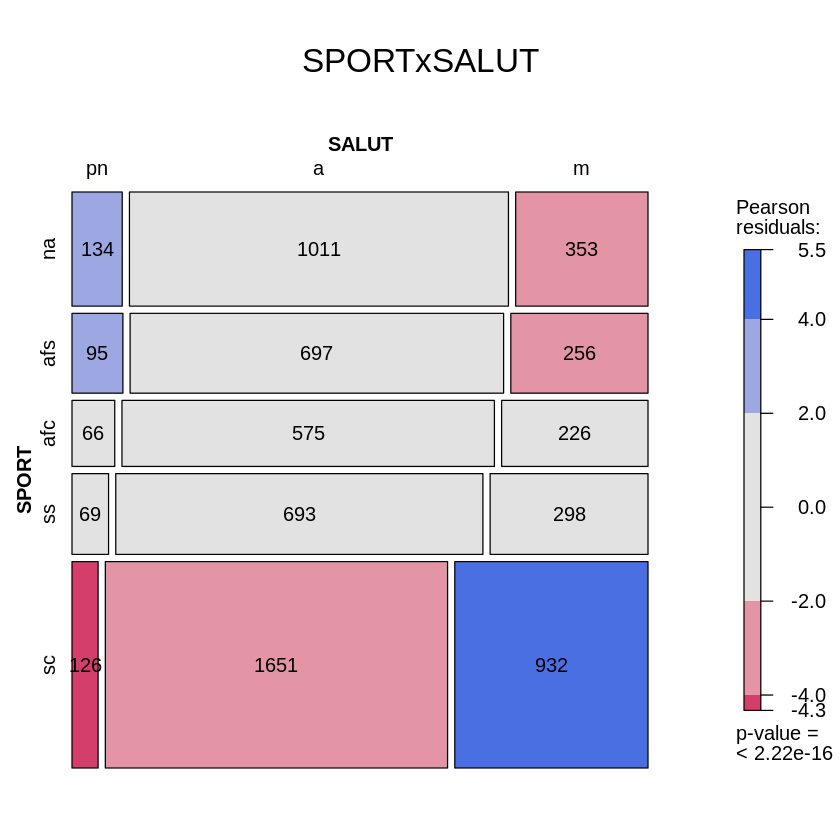

In [ ]:
mosaic(~ SPORT + SALUT, data = AVQ18.sport, main = "SPORTxSALUT", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

La relazione tra SPORT e salute percepita (SALUT) mostra un legame tra gli individui che non fanno attività o praticano attività fisiche saltuarie e hanno una percezione negativa del proprio stato di salute.
Al contrario chi pratica sport continuativo tende a percepirsi molto più in salute.
Come già evidenziato in relazione al BMI, non emergono differenze particolari tra gli individui che praticano sport saltuario e attività fisica continuativa.

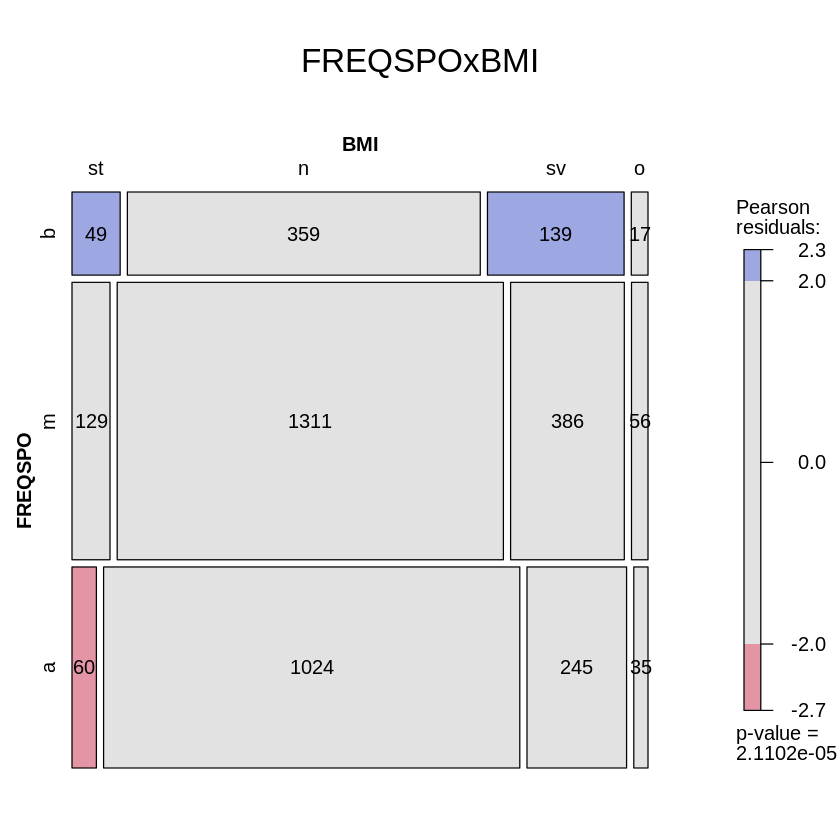

In [ ]:
mosaic(~ FREQSPO + BMI, data = AVQ18.sport, main = "FREQSPOxBMI", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

In corrispondenza di una frequenza sportiva "media" non emerge nessuna differenza statisticamente significativa rispetto al BMI degli individui. Si osserva invece un legame tra gli individui sottopeso o sovrappeso e una bassa frequenza sportiva. 
L'alta frequenza sportiva risulta invece associata negativamente con un livello di BMI corrispondente a "sottopeso".

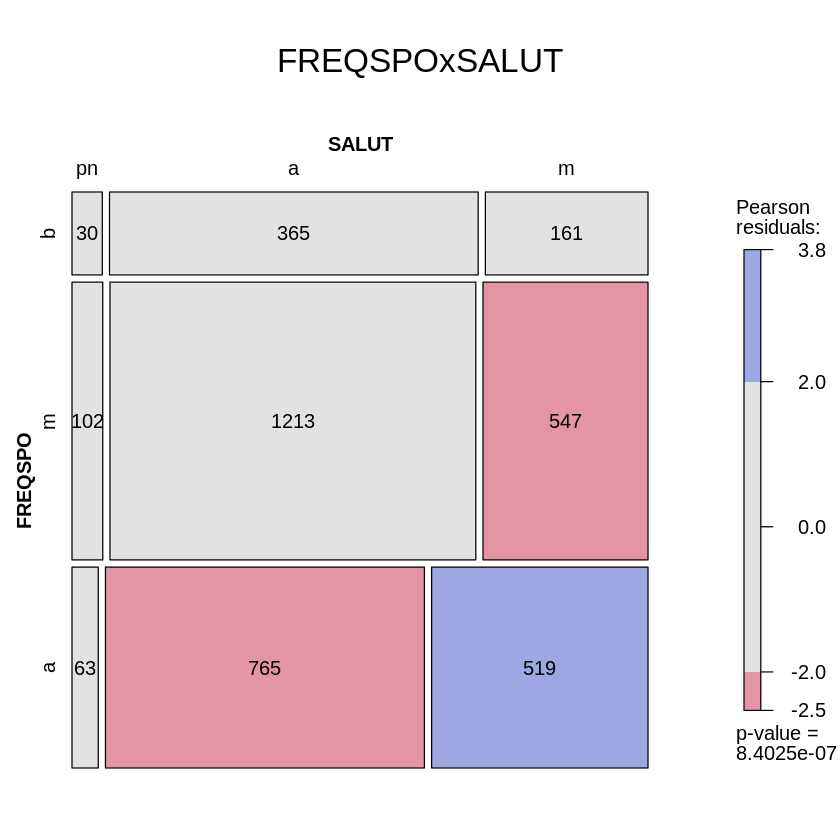

In [ ]:
mosaic(~ FREQSPO + SALUT, data = AVQ18.sport, main = "FREQSPOxSALUT", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

Dall'analisi tra la frequenza sportiva (FREQSPO) e la salute percepita (SALUT) emerge un'associazione positiva tra chi pratica frequentemente un'attività sportiva e ha una percezione migliore della propria salute.

Tra quelli che hanno risposto di svolgere un'attività sportiva con una frequenza media vi è un'associazione negativa con la modalità di risposta "molto in salute".

Non emergono particolari differenze tra gli individui che praticano poco sport.

#### Bivariata // Focus Risorse Economiche

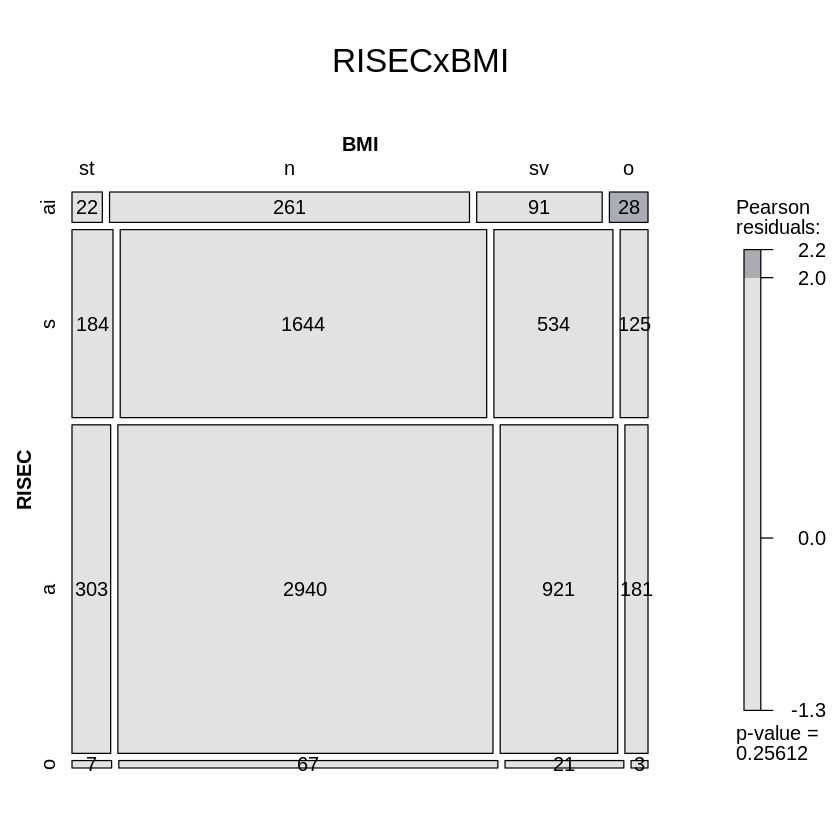

In [ ]:
mosaic(~ RISEC + BMI, data = AVQ18.sport, main = "RISECxBMI", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

La variabile RISEC è la misura dell'adeguatezza delle risorse economiche della famiglia di appartenenza percepita dall'intervistato.

L'analisi tra l'adeguatezza delle risorse economiche e il BMI non ha evidenziato associazioni statisticamente significative.

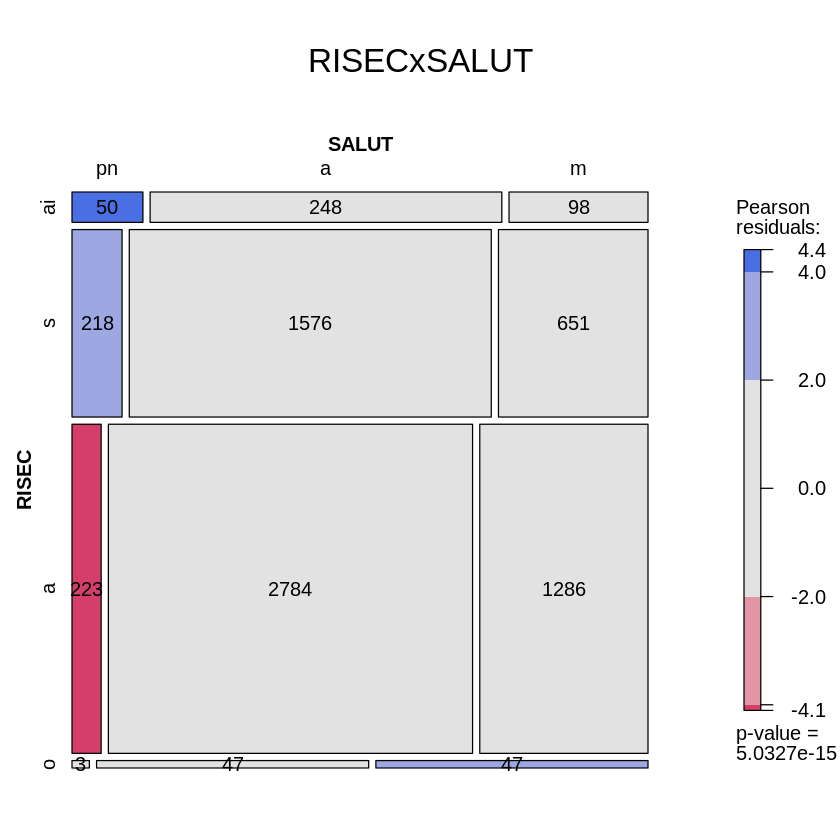

In [ ]:
mosaic(~ RISEC + SALUT, data = AVQ18.sport, main = "RISECxSALUT", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

Il rapporto tra le risorse economiche e la salute percepita mostra un'associazione positiva tra risorse "scarse" e "assolutamente insufficienti" e la percezione di essere "poco/per niente in salute".
Inoltre, chi dichiara di avere risorse economiche ottime tende a percepirsi come "molto in salute". 

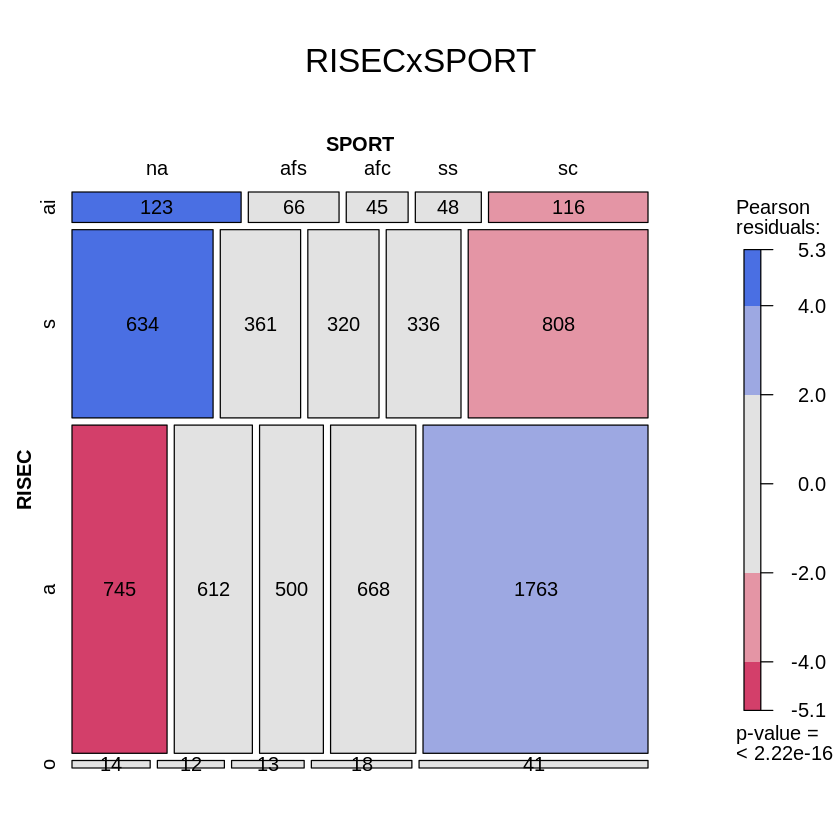

In [ ]:
mosaic(~ RISEC + SPORT, data = AVQ18.sport, main = "RISECxSPORT", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

Anche per quanto riguarda la relazione tra le risorse economiche e l'attività sportiva, emerge un'associazione positiva tra risorse "scarse" e "assolutamente insufficienti" e l'inattività sportiva. Inoltre, risulta esserci un'associazione positiva tra risorse economiche "adeguate" e la pratica di sport continuativo.

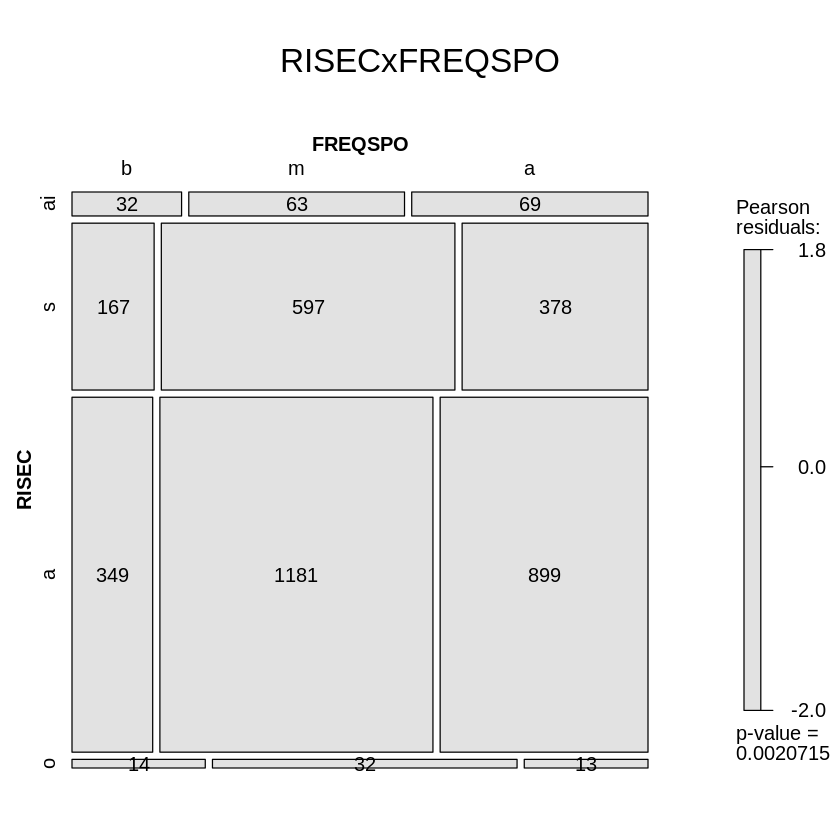

In [ ]:
mosaic(~ RISEC + FREQSPO, data = AVQ18.sport, main = "RISECxFREQSPO", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

L'analisi tra l'adeguatezza delle risorse economiche e la frequenza dell'attività sportiva non ha evidenziato associazioni statisticamente significative.

#### Bivariata // Focus Istruzione

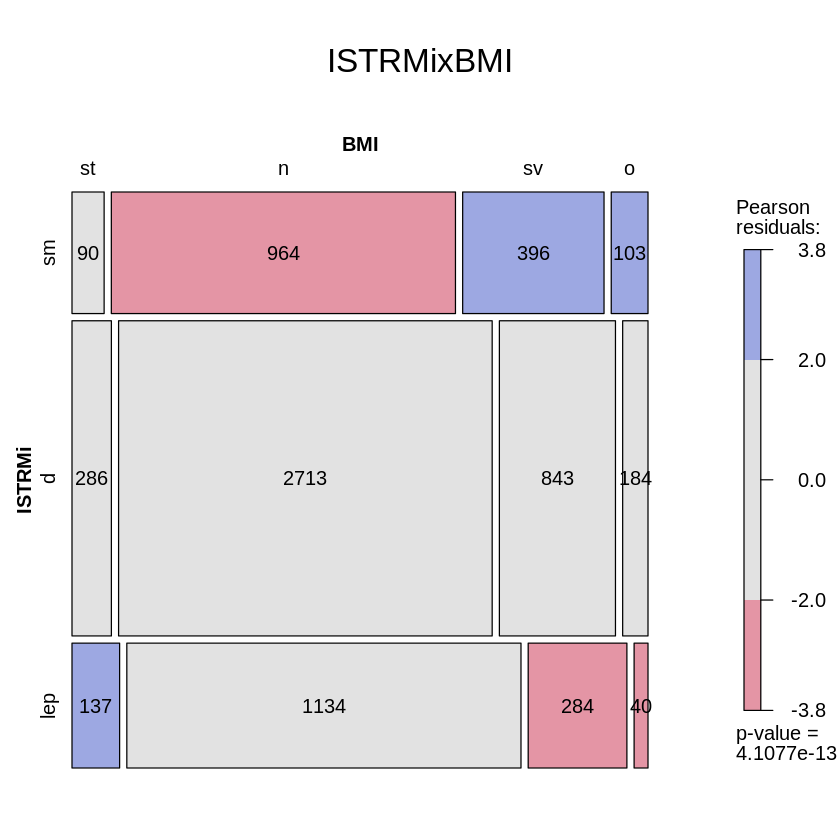

In [ ]:
mosaic(~ ISTRMi + BMI, data = AVQ18.sport, main = "ISTRMixBMI", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

L'analisi tra livello di istruzione e BMI mostra un'associazione positiva tra gli individui che hanno terminato al massimo il primo ciclo di studi e le modalità "obeso" o "sovrappeso". La più alta concentrazione di individui obesi o in sovrappeso si accompagna a un minor numero di individui normopeso.
Al contrario, c'è un'associazione negativa tra chi ha una laurea o un titolo post laurea e le modalità "sovrappeso" e "obeso"; allo stesso tempo è possibile apprezzare per questo gruppo un'associazione positiva con la modalità "sottopeso".

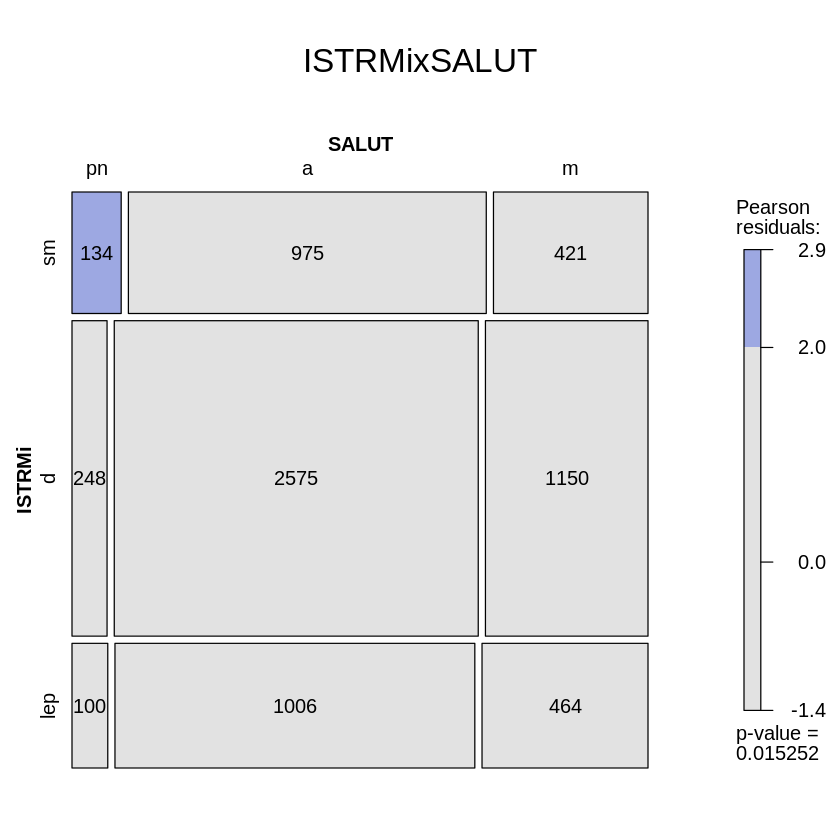

In [ ]:
mosaic(~ ISTRMi + SALUT, data = AVQ18.sport, main = "ISTRMixSALUT", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

Nella relazione tra livello di istruzione e salute percepita si osserva una situazione più sfumata. Emergono differenze statisticamente significative solo per gli individui che hanno terminato al massimo il primo ciclo di studi che presentano un'associazione positiva con una percezione del proprio stato di salute corrispondente a "poco/per niente soddisfatto".

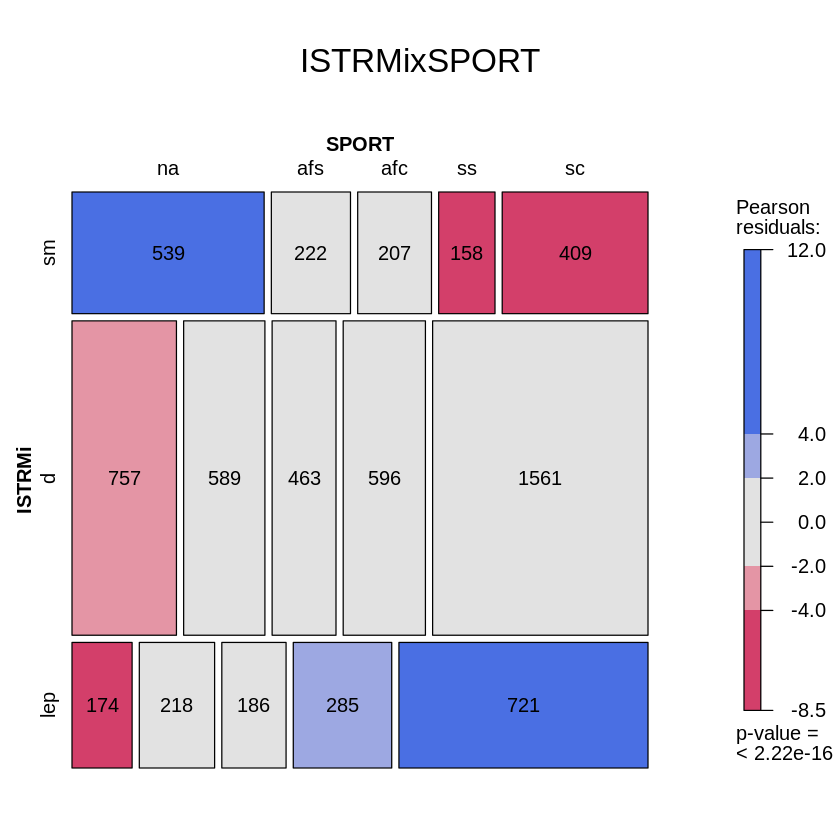

In [ ]:
mosaic(~ ISTRMi + SPORT, data = AVQ18.sport, main = "ISTRMixSPORT", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

Tra coloro che praticano sport saltuario o continuativo emerge un'associazione positiva con il titolo di studio "laurea o post laurea" e negativa con il livello di istruzione più basso (al massimo il primo ciclo di studi).

Specularmente gli individui che non praticano attività sportiva presentano un'associazione positiva con il livello di istruzione più basso e negativa con i livelli di istruzione più alti (diploma/laurea e post laurea).

Non si osservano differenze apprezzabili tra le attività fisiche continuative o saltuarie e il livello di istruzione.

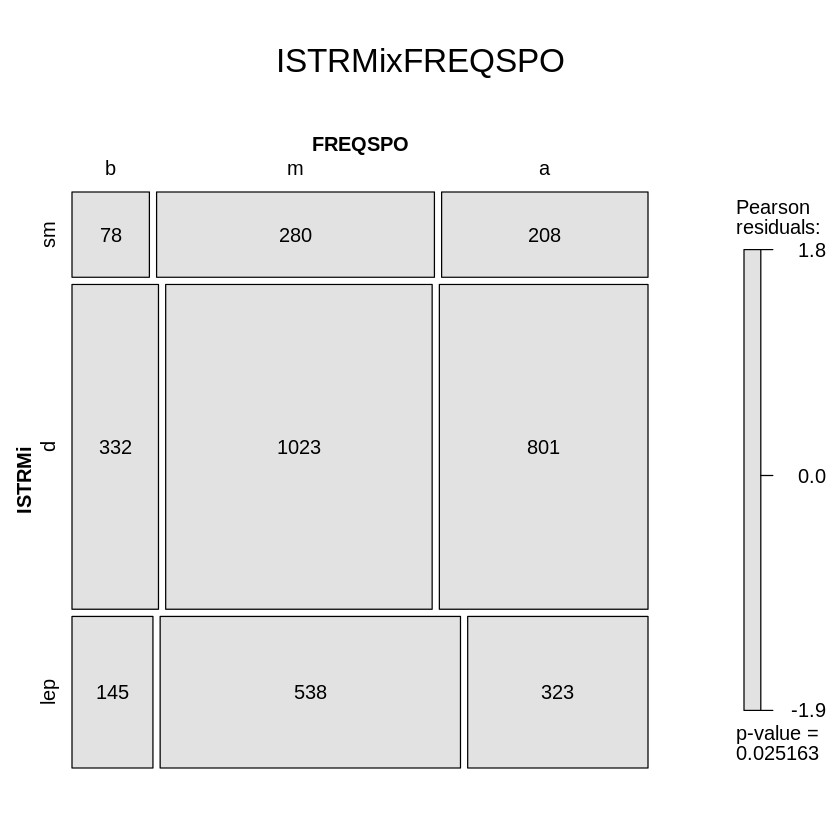

In [ ]:
mosaic(~ ISTRMi + FREQSPO, data = AVQ18.sport, main = "ISTRMixFREQSPO", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

L'analisi tra livello di istruzione e frequenza dell'attività sportiva non presenta differenze statisticamente significative.

#### Bivariata // Focus Ripartizione Geografica

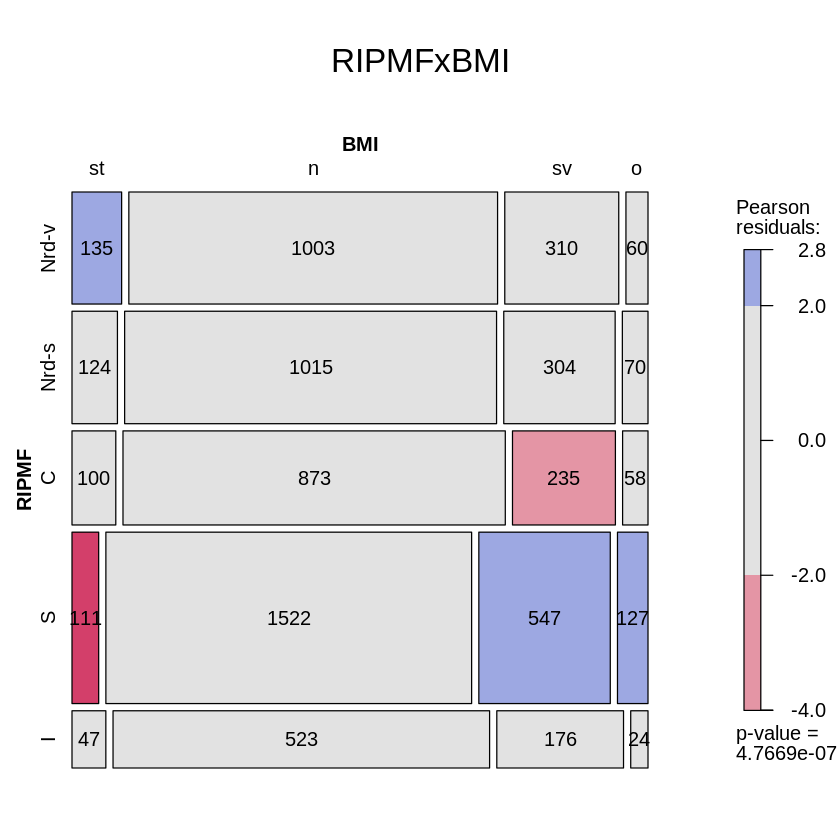

In [ ]:
mosaic(~ RIPMF + BMI, data = AVQ18.sport, main = "RIPMFxBMI", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

Si osservano alcune differenze sulla ripartizione geografica per quanto riguarda il BMI degli intervistati. Vi è un'associazione negativa marcata tra la modalità "sottopeso" e il Sud Italia, mentre la stessa modalità è associata positivamente nel Nord Ovest del Paese. Al Sud, inoltre si può notare una maggiore concentrazione di individui sovrappeso od obesi.
Infine, nel Centro Italia c'è una minore concentrazione di individui in sovrappeso.

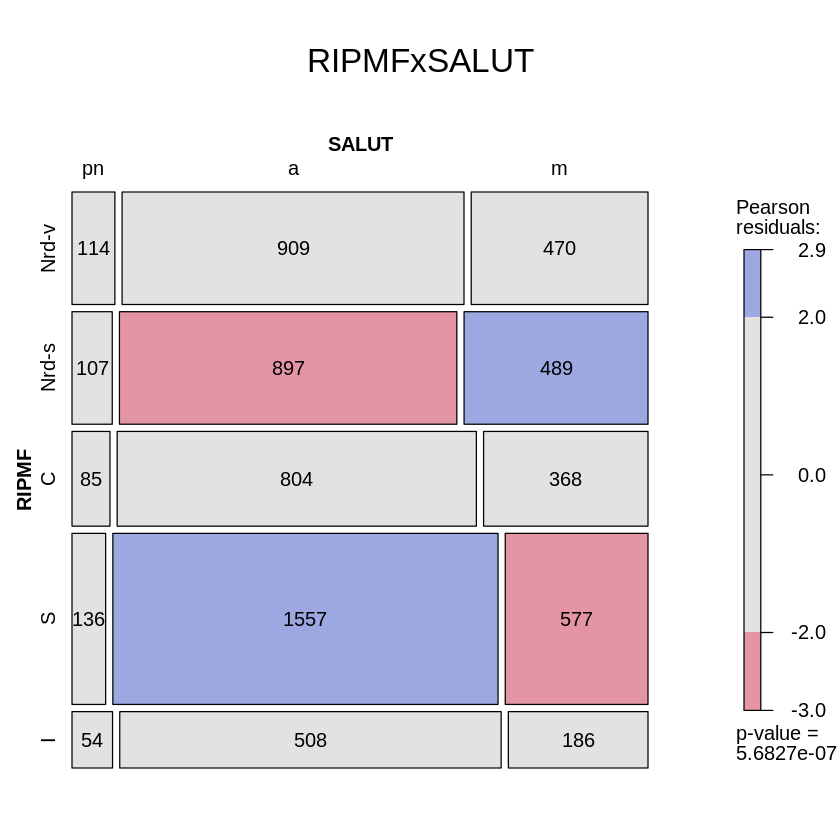

In [ ]:
mosaic(~ RIPMF + SALUT, data = AVQ18.sport, main = "RIPMFxSALUT", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

Nel Nord Est del Paese si osserva un'associazione positiva con la modalità "molto in salute", mentre nel Sud Italia l'associazione positiva si sposta sulla modalita "abbastanza in salute".

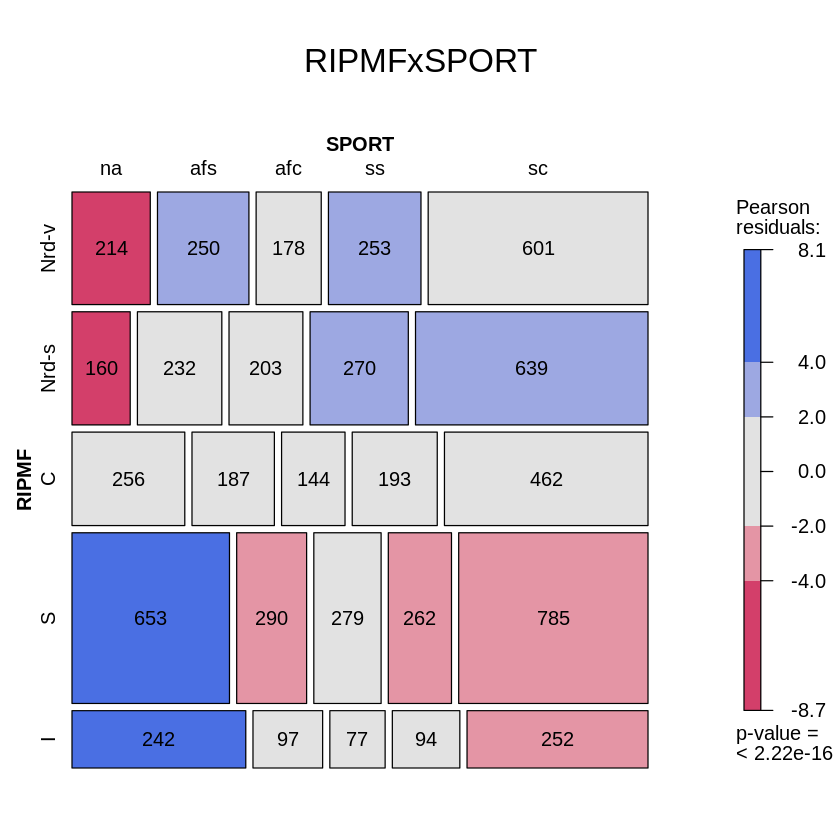

In [ ]:
mosaic(~ RIPMF + SPORT, data = AVQ18.sport, main = "RIPMFxSPORT", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

Dal grafico emerge un Paese diviso in due: il Nord, dove si osserva una maggiore propensione a svolgere sport e attività fisica e il Sud e le Isole, dove la situazione si capovolge.
Nel Centro Italia non si evidenziano particolari associazioni rispetto alla variabile SPORT.

Da segnalare il caso dell'attività fisica continuativa che non presenta differenze significative in nessuna delle ripartizioni geografiche considerate. 

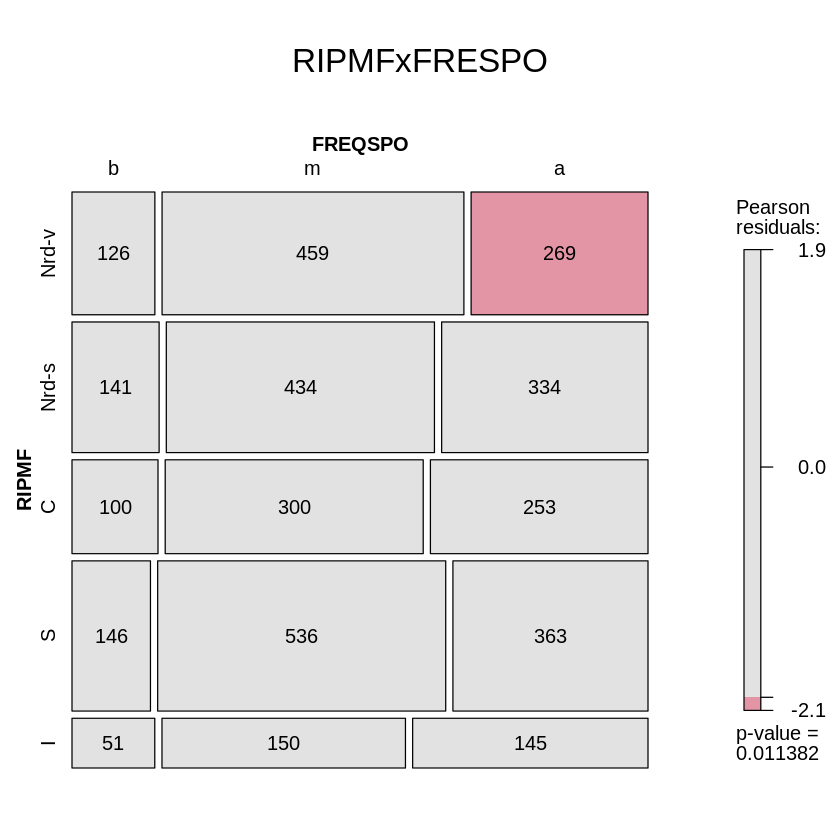

In [ ]:
mosaic(~ RIPMF + FREQSPO, data = AVQ18.sport, main = "RIPMFxFRESPO", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

Risulta poco rilevante l'analisi relativa alla frequenza sportiva, fatta eccezione per la presenza di un'associazione negativa tra gli individui che praticano molto sport e la ripartizione geografica Nord Ovest.

#### Bivariata // Focus Sesso

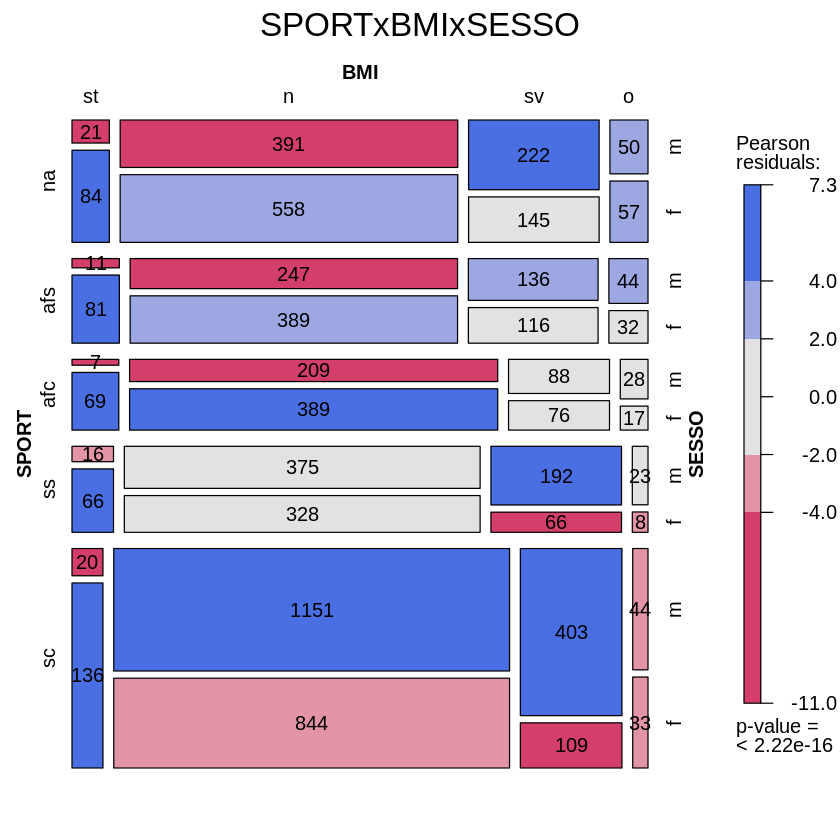

In [ ]:
mosaic(~ SPORT + BMI + SESSO, data = AVQ18.sport, main = "SPORTxBMIxSESSO", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

Nell'analisi tra sport, BMI e sesso si osserva che lo sport continuativo è associato positivamente alle modalità "normopeso" e "sovrappeso" per i maschi e alla modalità "sottopeso" per le femmine. Per entrambi i sessi la pratica sportiva continuativa risulta essere protettiva nei confronti dell'obesità.

Riguardo la pratica sportiva saltuaria emerge un quadro simile a quello dello sport continuativo, con la sola differenza relativa alla modalità "obeso" che risulta associata negativamente solo per gli individui di sesso femminile.

Nella fascia di individui che dichiarano di svolgere una forma di attività fisica, sia essa continuativa o saltuaria, le femmine presentano un'associazione positiva con le modalità "sottopeso" e "normopeso"; tra gli uomini, invece, è possibile osservare un legame negativo con queste due modalità. Inoltre, gli uomini che fanno attività fisica saltuaria tendono a presentare in misura maggiore le modalità "sovrappeso" e "obeso".

Infine, tra gli individui che non svolgono alcuna forma di attività fisica o sportiva, per i maschi si accentua la situazione descritta per l'attività fisica saltuaria, mentre per le femmine si osserva inoltre un'associazione positiva con l'obesità.

In generale è possibile evidenziare una prevalenza della modalità "sottopeso" per gli individui di sesso femminile.

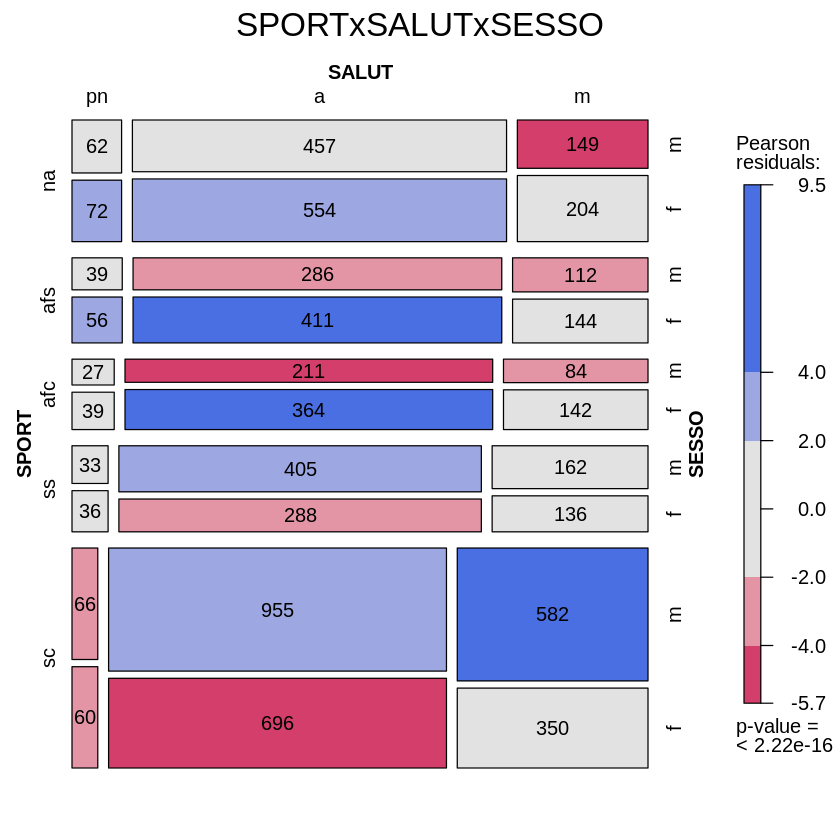

In [ ]:
mosaic(~ SPORT + SALUT + SESSO, data = AVQ18.sport, main = "SPORTxSALUTxSESSO", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

Nell'analisi tra sport, salute percepita e sesso si osserva un andamento diverso tra individui di sesso maschile e femminile. Tendenzialmente i maschi si percepiscono più in salute rispetto alle femmine, aspetto che emerge più chiaramente nelle due classi estreme ("sport continuativo" e "nessuna attività").
Inoltre, è possibile osservare che nelle modalità riguardanti l'attività fisica (saltuaria o continua) le femmine si percepiscono più in salute rispetto ai maschi.

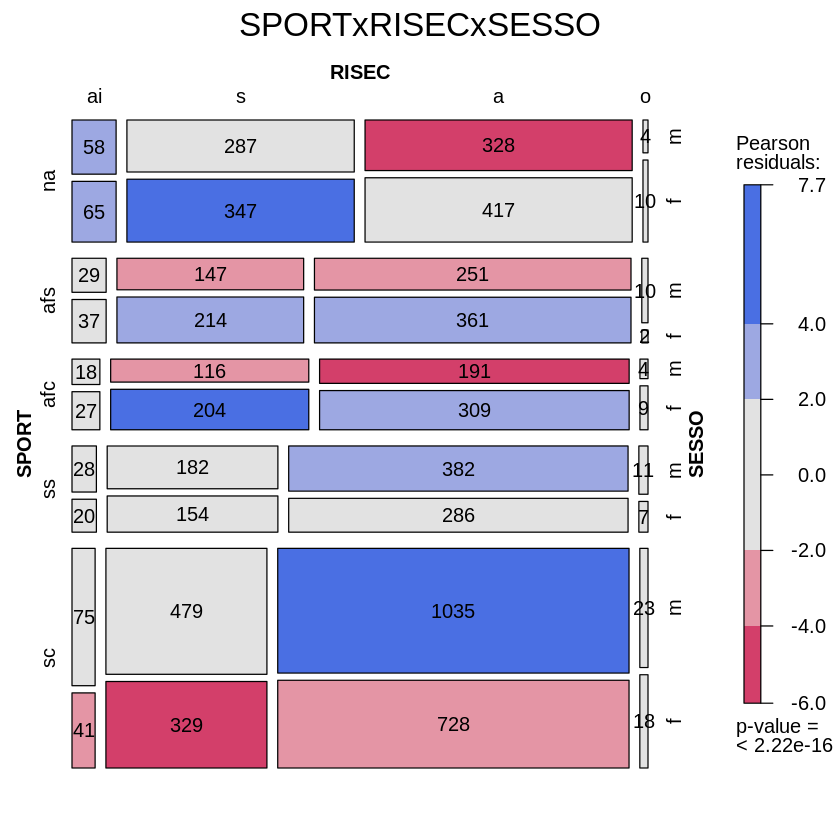

In [ ]:
mosaic(~ SPORT + RISEC + SESSO, data = AVQ18.sport, main = "SPORTxRISECxSESSO", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

L'analisi tra sport, risorse economiche e sesso mostra che in corrispondenza di risorse economiche "assolutamente insufficienti", a prescindere dal sesso, gli individui praticano meno sport o attività fisica. In presenza di risorse scarse, per le femmine si osserva un'associazione positiva sia con l'attività fisica (saltuaria o continuativa) sia con l'inattività. Invece, in corrispondenza di risorse economiche adeguate, per i maschi emerge un'associazione positiva con l'attività sportiva (continuativa o saltuaria), mentre per le femmine si conferma un legame positivo con l'attività fisica.

#### Analisi Multivariata // MCA

In [ ]:
library("FactoMineR")
library("factoextra")
library("ggplot2")
library("ggrepel")

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [ ]:
install.packages("cluster")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("cluster")

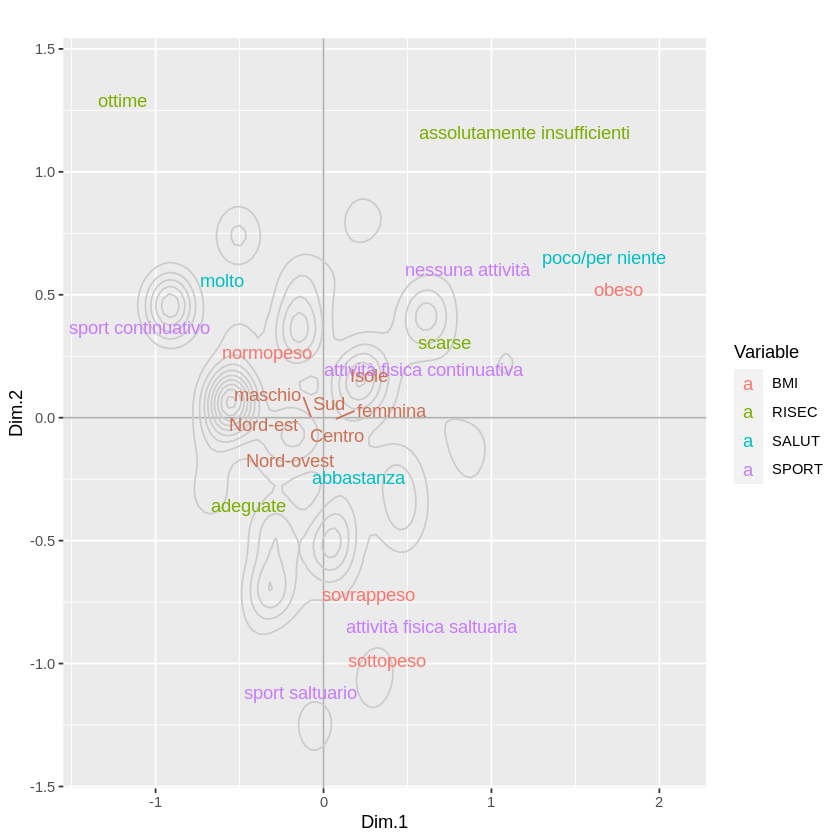

In [ ]:
###################### NUOVA
  df <- AVQ18.sport[,c('BMI','SALUT','SPORT','RISEC','SESSO','RIPMF')]
  df <- na.omit(df)
  cats = apply(df[,1:4], 2, function(x) nlevels(as.factor(x)))
  mca1 = MCA(df,quali.sup = c(5:6), graph = FALSE)
  mca1_vars_df = data.frame(mca1$var$coord, Variable = rep(names(cats), cats))
  mca1_vars_sup_df = data.frame(mca1$quali.sup$coord)
  mca1_obs_df = data.frame(mca1$ind$coord)
  ggplot(data = mca1_obs_df, aes(x = Dim.1, y = Dim.2))+
  geom_hline(yintercept = 0, colour = "gray70")+
  geom_vline(xintercept = 0, colour = "gray70")+
  geom_point(colour = "gray50", alpha = 0.0)+
  geom_density2d(colour = "gray80")+
  geom_text_repel(data = mca1_vars_df,aes(x = Dim.1, y = Dim.2,label = rownames(mca1_vars_df), colour = Variable))+
  geom_text_repel(data = mca1_vars_sup_df,aes(x = Dim.1, y = Dim.2,label = rownames(mca1_vars_sup_df)),color="salmon3")+
  ggtitle("")+
  scale_colour_discrete(name = "Variable")

In [ ]:
res.fanny <- fanny(mca1$ind$coord, 4,metric ="euclidean",stand =FALSE)

In [ ]:
head(mca1$ind$coord[,1:2])

,Dim 1,Dim 2
1,0.8374083,0.61816163
2,-0.9117960,0.45505965
3,-0.5491796,0.06559885
4,-0.9117960,0.45505965
5,-0.0633691,-1.36911747
6,0.8960941,0.70720260


In [ ]:
head(res.fanny$clustering)

1 2 3 4 5 6 
1 1 1 1 1 1

In [ ]:
#fviz_cluster(res.fanny,ellipse.type ="norm",repel =TRUE,palette ="jco",ggtheme =theme_minimal(),legend ="right")

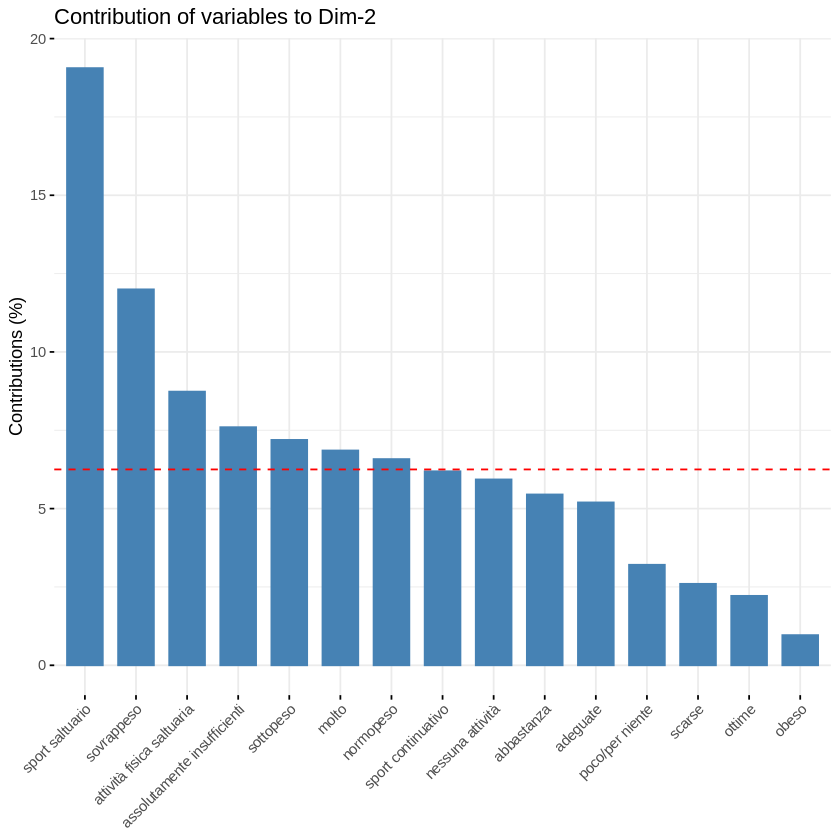

In [ ]:
#fviz_screeplot(mca1, addlabels = TRUE, ylim = c(0, 45))
#fviz_mca_var(mca1, choice = "mca.cor",repel = TRUE,ggtheme = theme_minimal())
#fviz_cos2(mca1, choice = "var", axes = 1:2)
#fviz_contrib(mca1, choice = "var", axes = 1, top = 15)
fviz_contrib(mca1, choice = "var", axes = 2, top = 15)

In [ ]:
ggmca <- function(df,title,moreinfo=c(TRUE,FALSE)){
  df <- na.omit(df)
  cats = apply(df, 2, function(x) nlevels(as.factor(x)))
  mca1 = MCA(df, graph = FALSE)
  mca1_vars_df = data.frame(mca1$var$coord, Variable = rep(names(cats), cats))
  mca1_obs_df = data.frame(mca1$ind$coord)
  g <- ggplot(data = mca1_obs_df, aes(x = Dim.1, y = Dim.2))+
  geom_hline(yintercept = 0, colour = "gray70")+
  geom_vline(xintercept = 0, colour = "gray70")+
  geom_point(colour = "gray50", alpha = 0.0)+
  geom_density2d(colour = "gray80")+
  geom_text(data = mca1_vars_df,aes(x = Dim.1, y = Dim.2,label = rownames(mca1_vars_df), colour = Variable))+
  ggtitle(title)+
  scale_colour_discrete(name = "Variable")
  if(moreinfo==FALSE){
    return(g)}
    else{
      c1 <- fviz_screeplot(mca1, addlabels = TRUE, ylim = c(0, 45))
      c2 <- fviz_mca_var(mca1, choice = "mca.cor",repel = TRUE,ggtheme = theme_minimal())
      c3 <- fviz_cos2(mca1, choice = "var", axes = 1:2)
      c4 <- fviz_contrib(mca1, choice = "var", axes = 1, top = 15)
      c5 <- fviz_contrib(mca1, choice = "var", axes = 2, top = 15)
      return(list(g,c1,c2,c3,c4,c5))#return(list(g, mca1))
    }
}

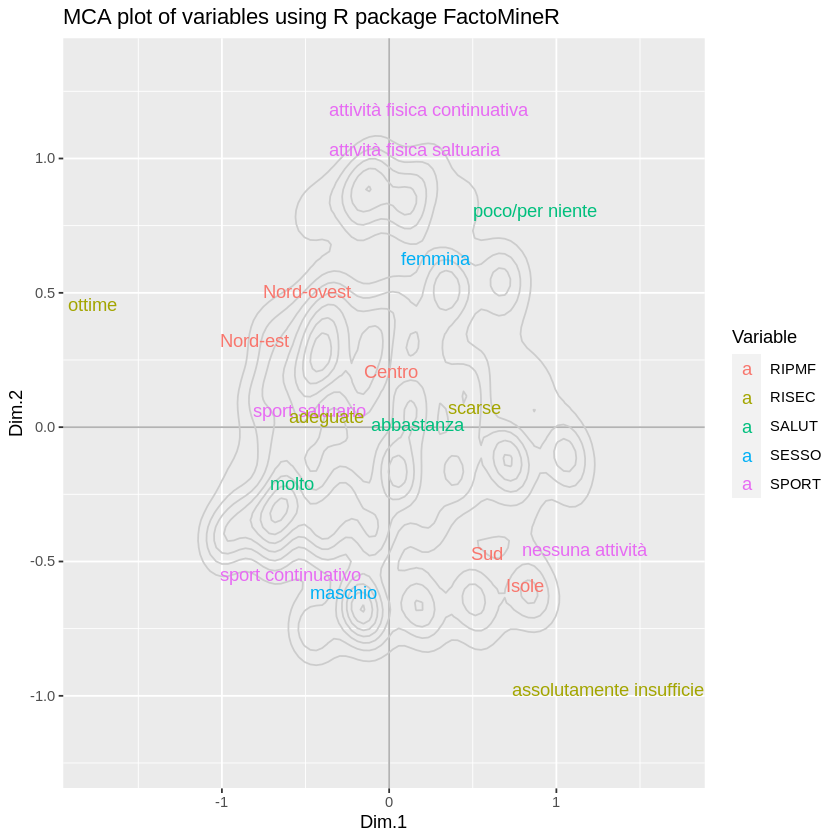

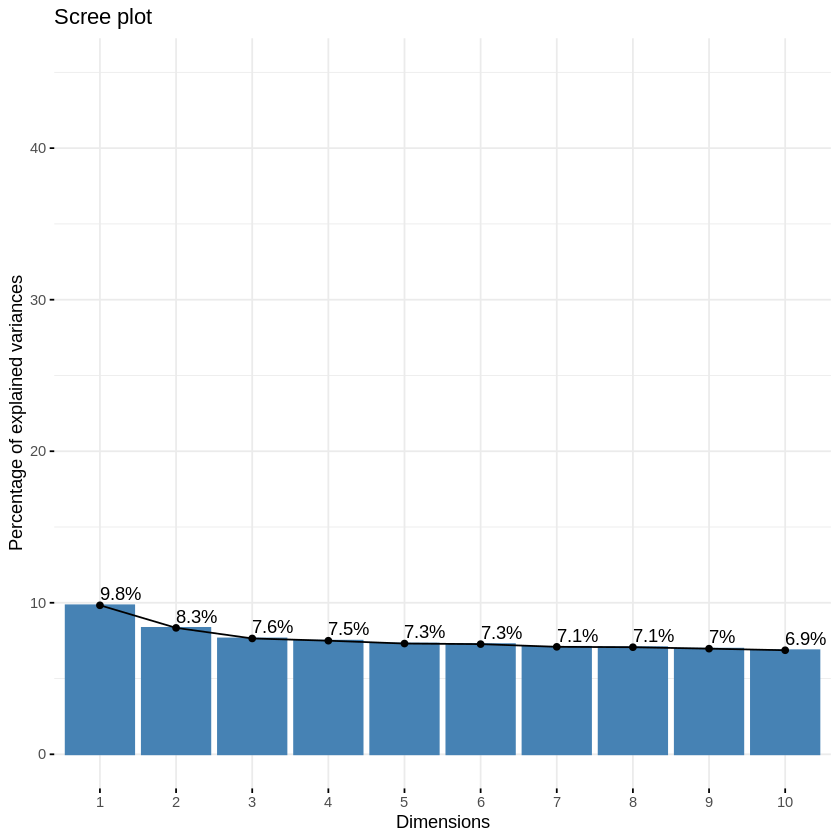

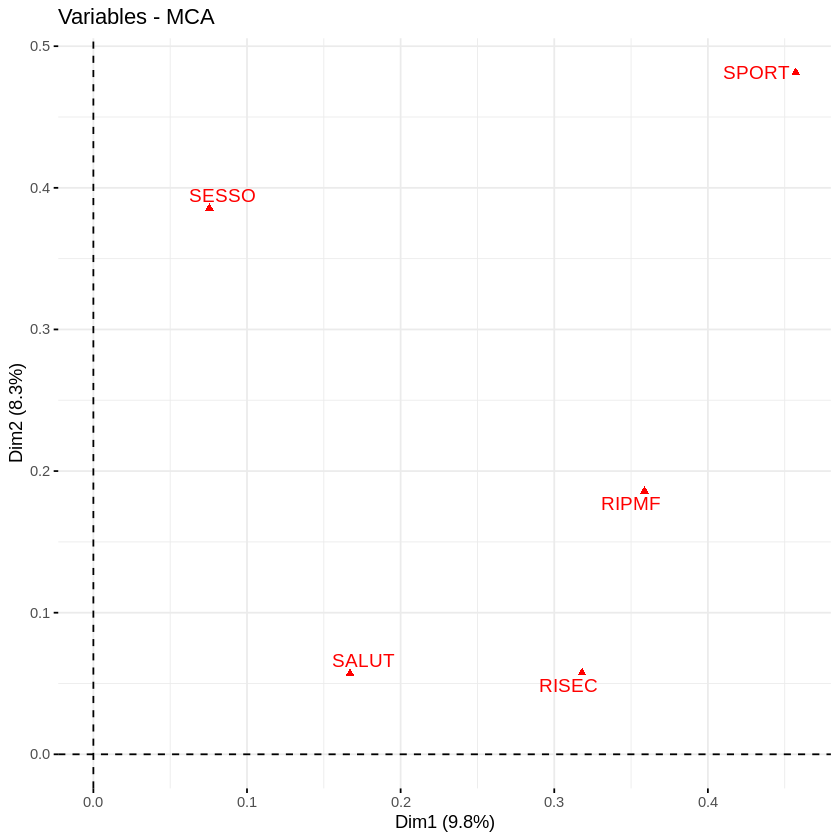

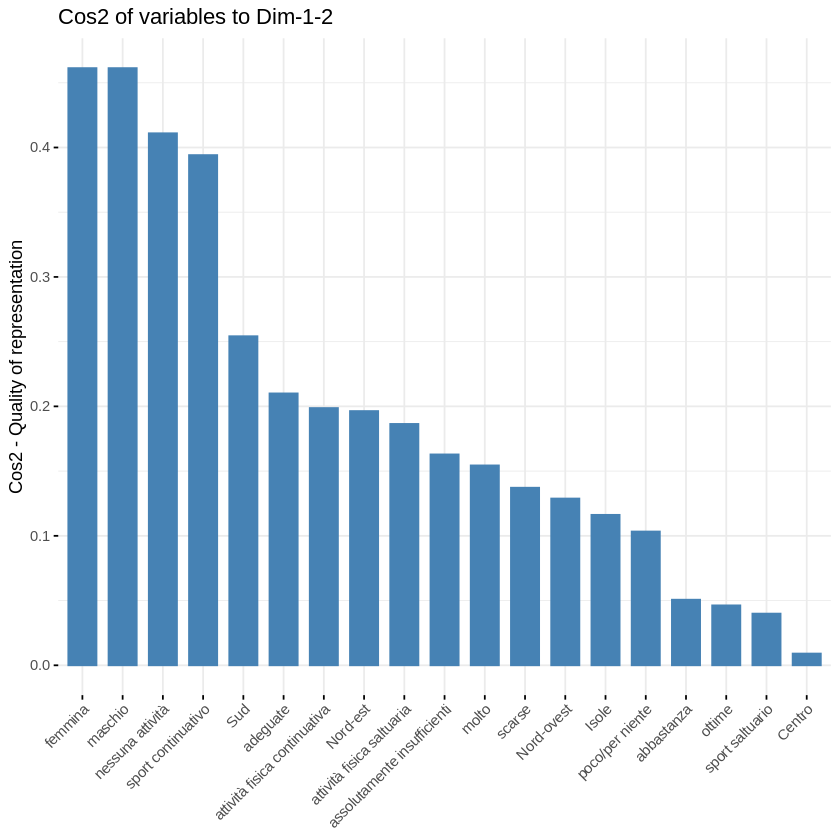

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]


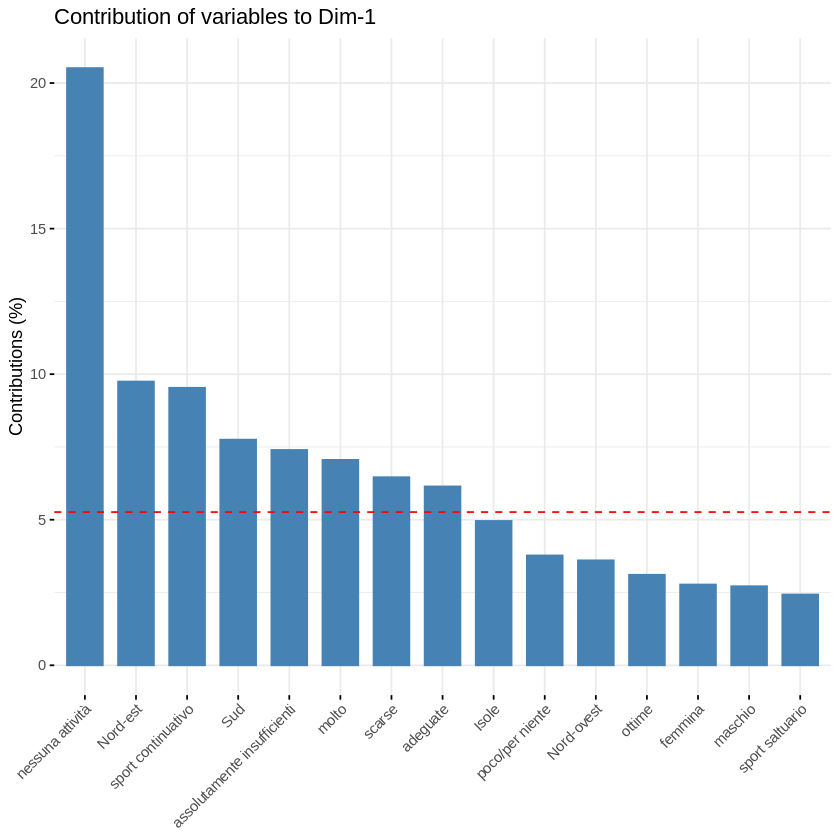

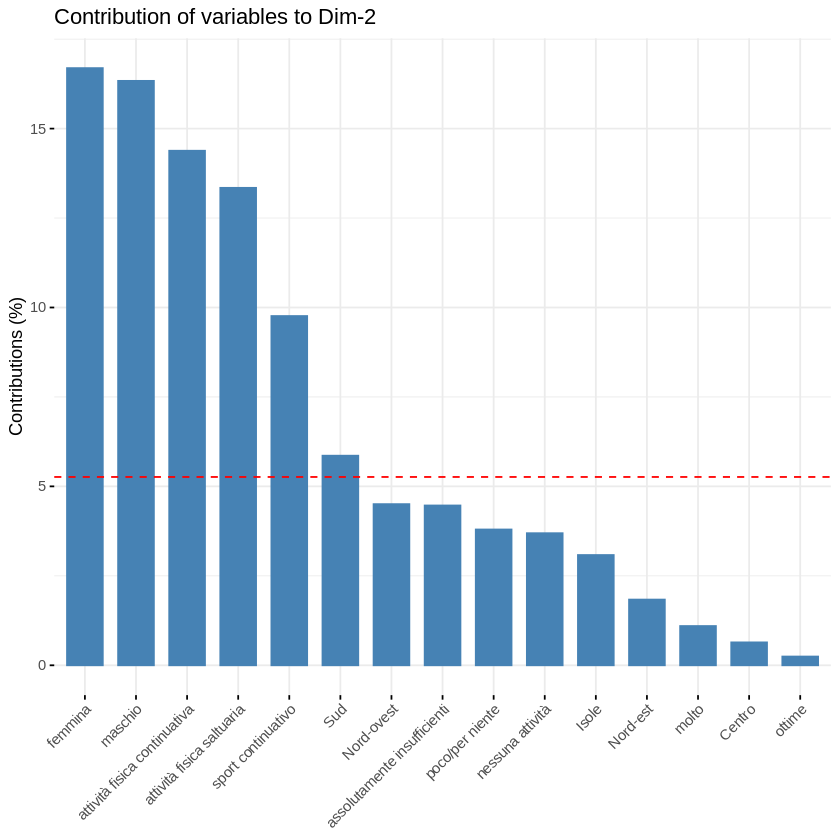

In [ ]:
ggmca(AVQ18.sport[,c('SALUT','SPORT','RISEC','RIPMF','SESSO')],"MCA plot of variables using R package FactoMineR",moreinfo=T)

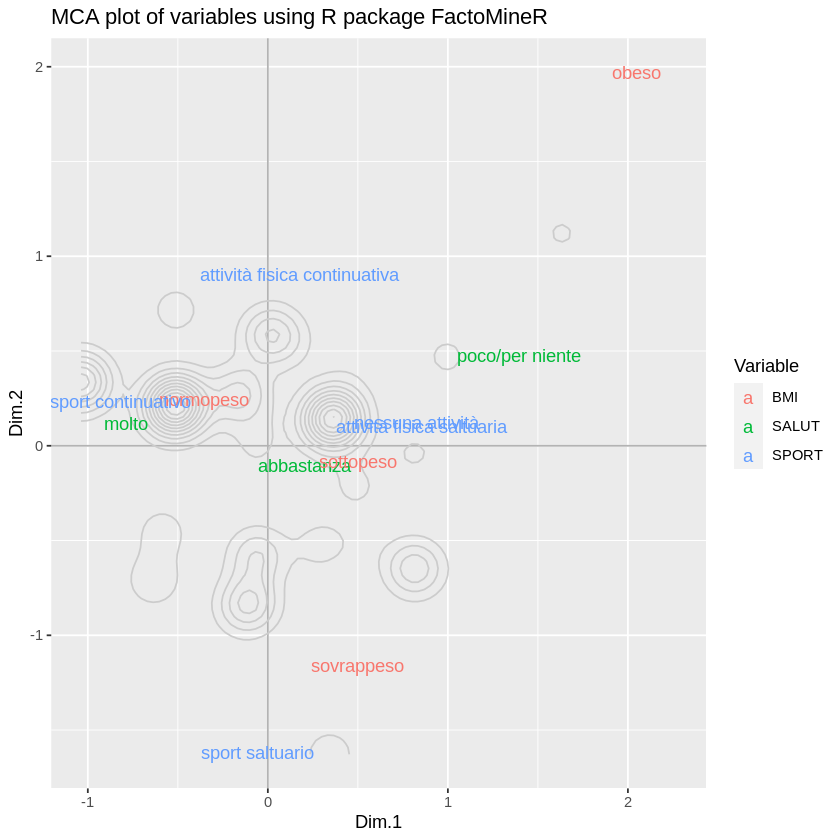

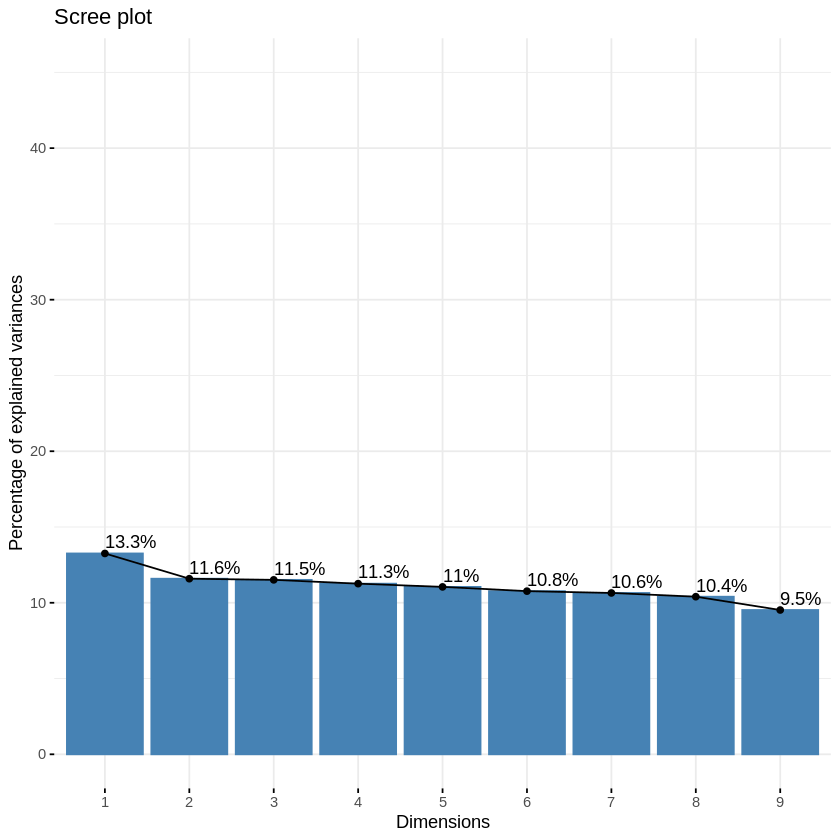

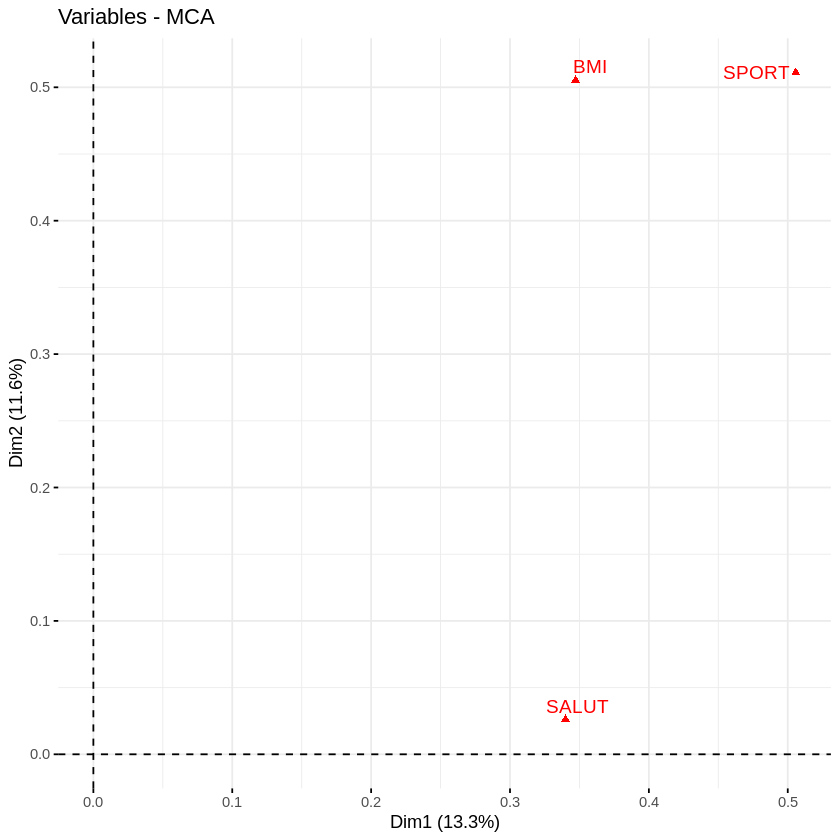

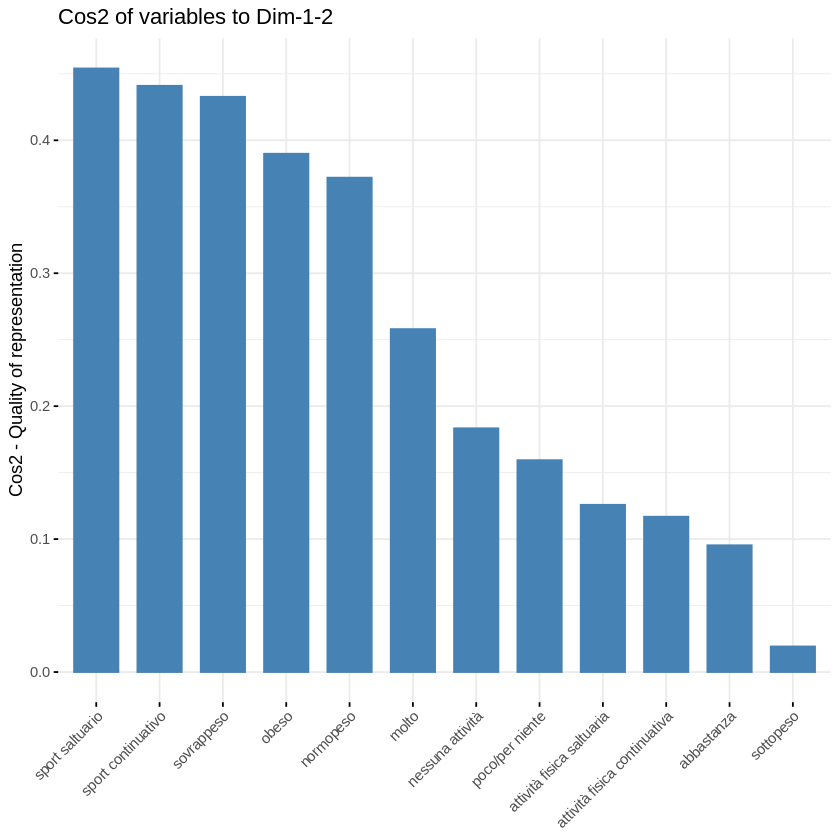

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]


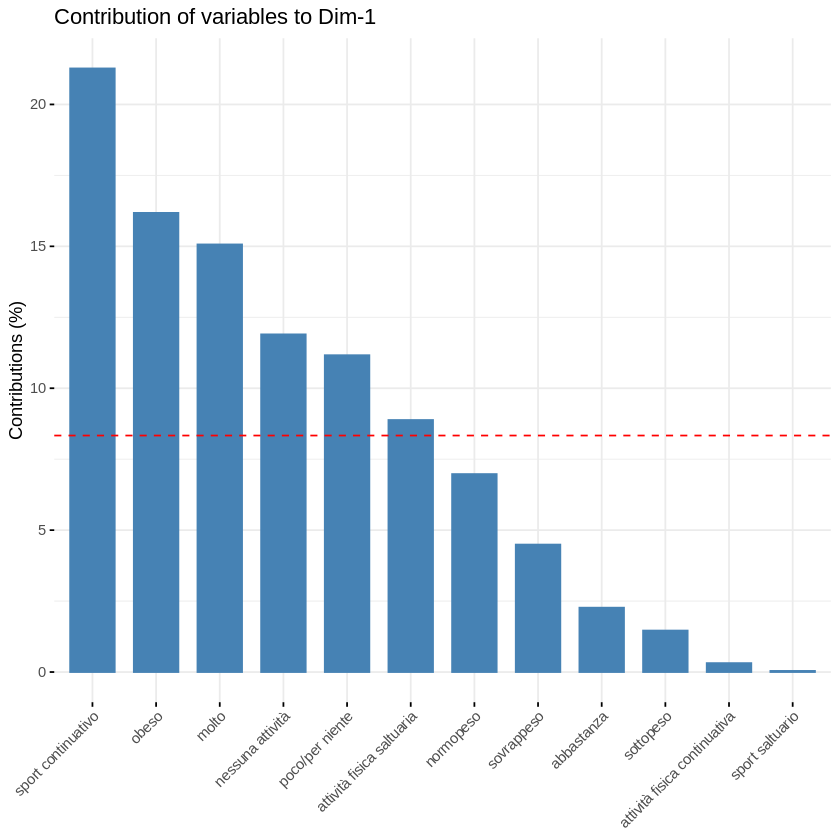

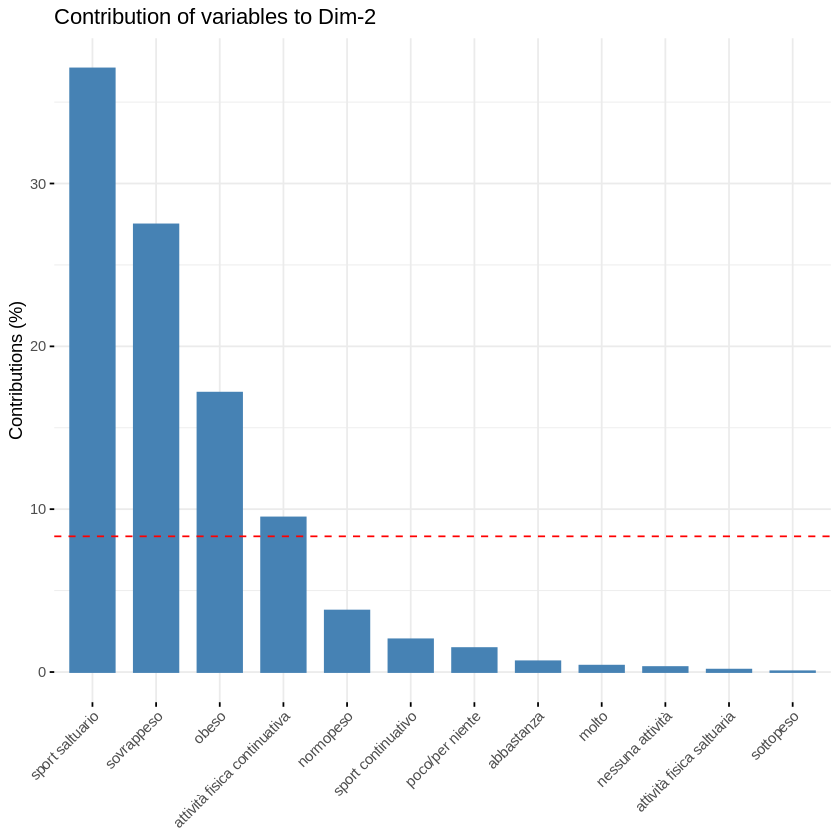

In [ ]:
ggmca(AVQ18.sport[,c('SALUT','BMI','SPORT')],"MCA plot of variables using R package FactoMineR",moreinfo=T)

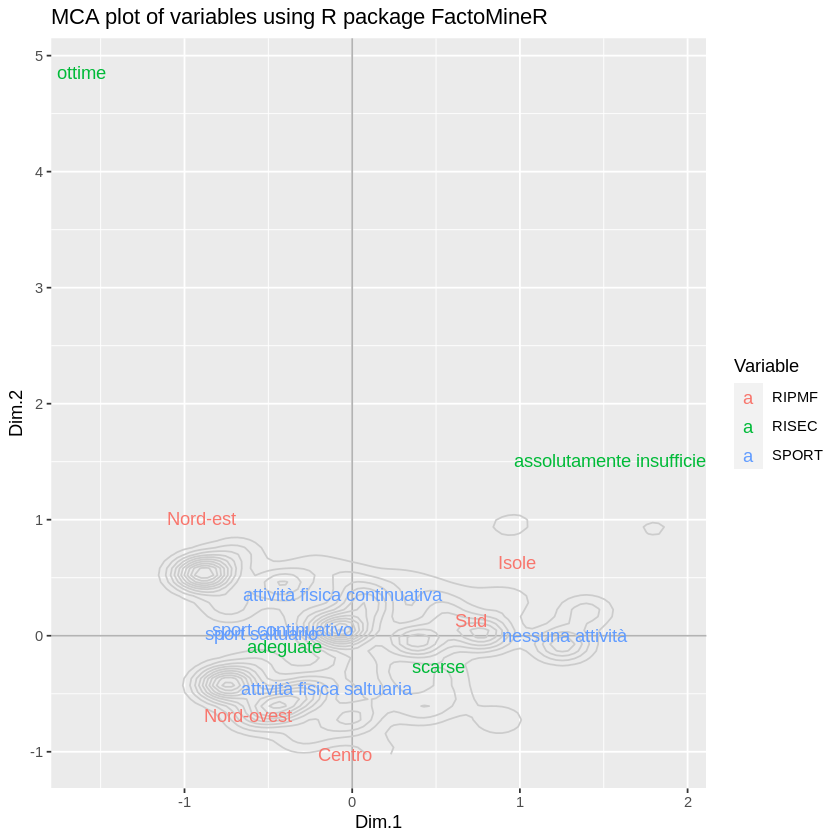

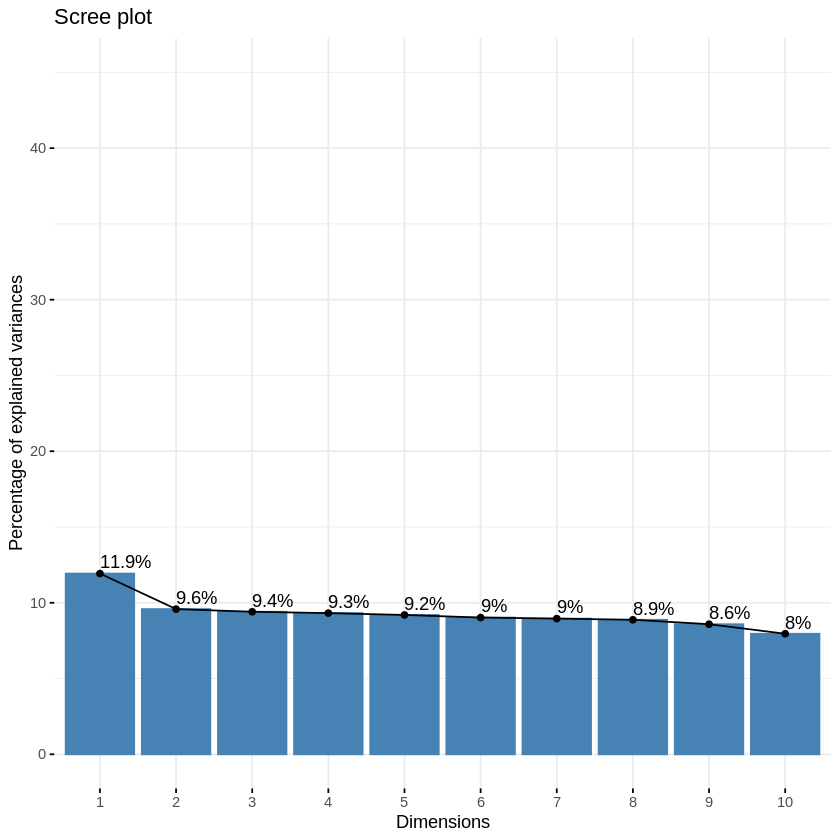

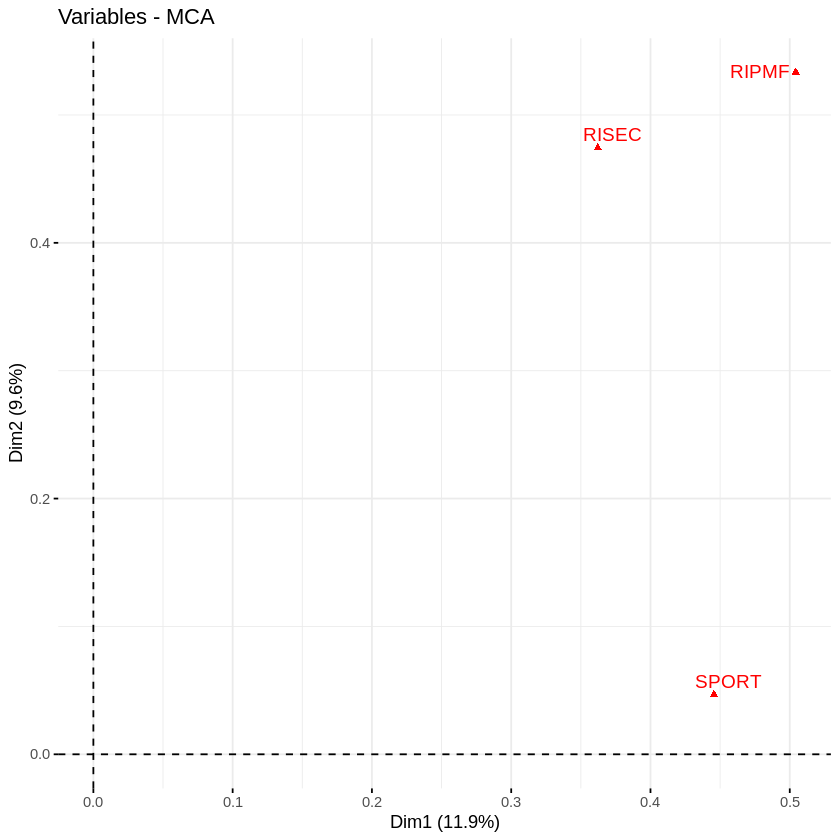

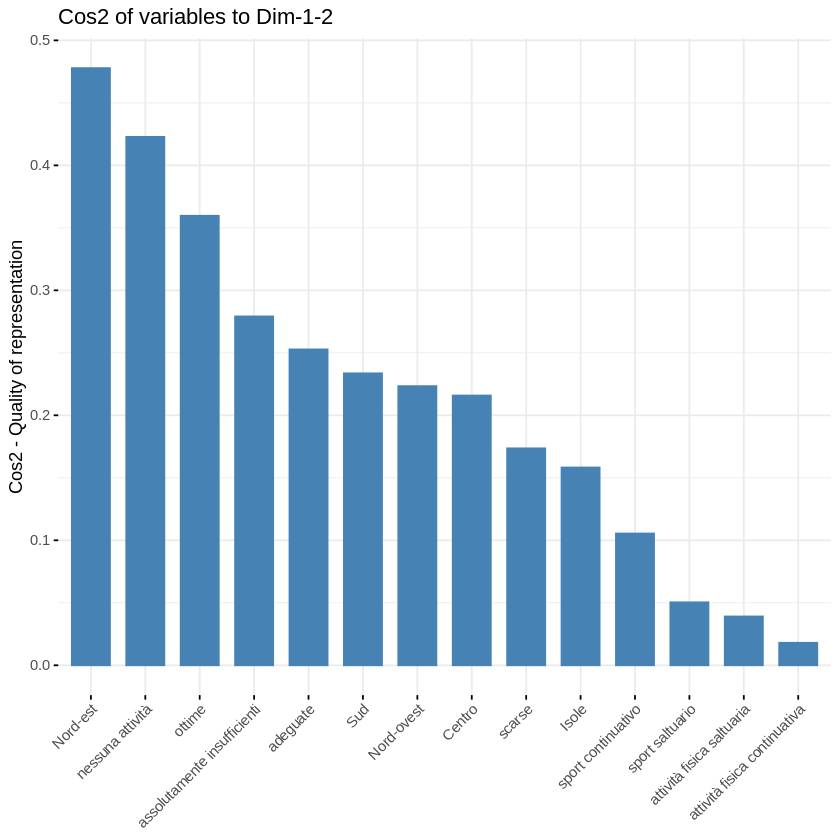

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]


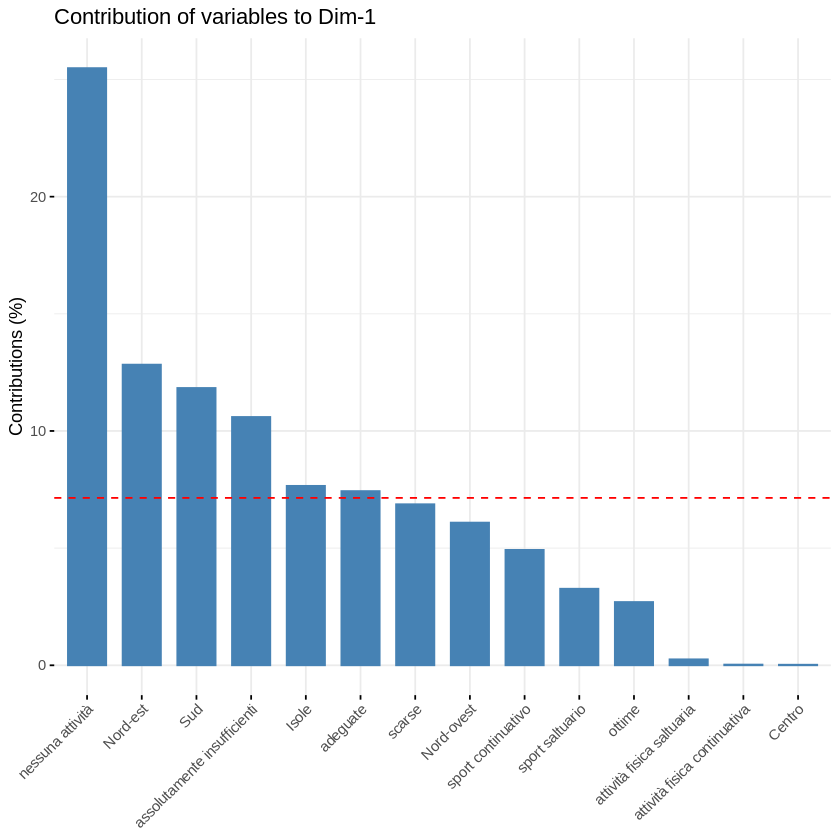

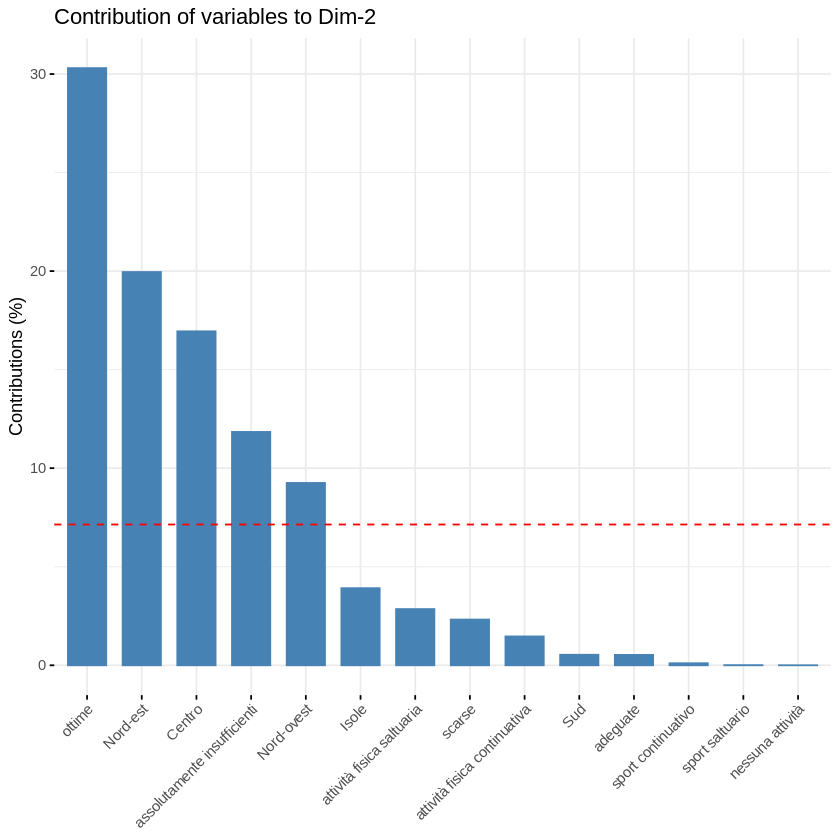

In [ ]:
ggmca(AVQ18.sport[,c('RISEC','SPORT','RIPMF')],"MCA plot of variables using R package FactoMineR",moreinfo=T)

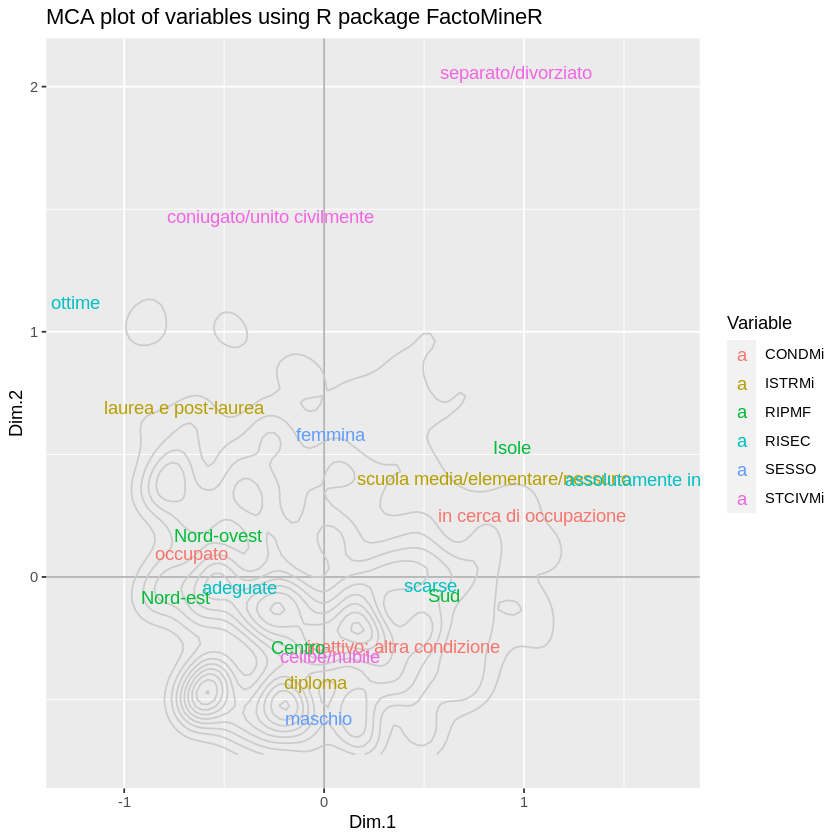

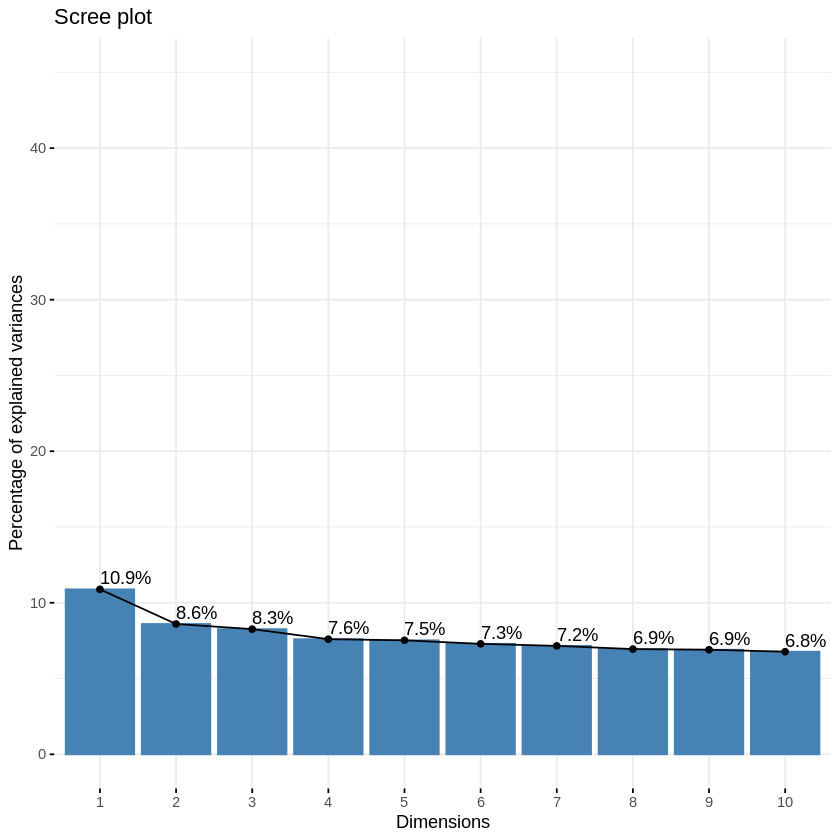

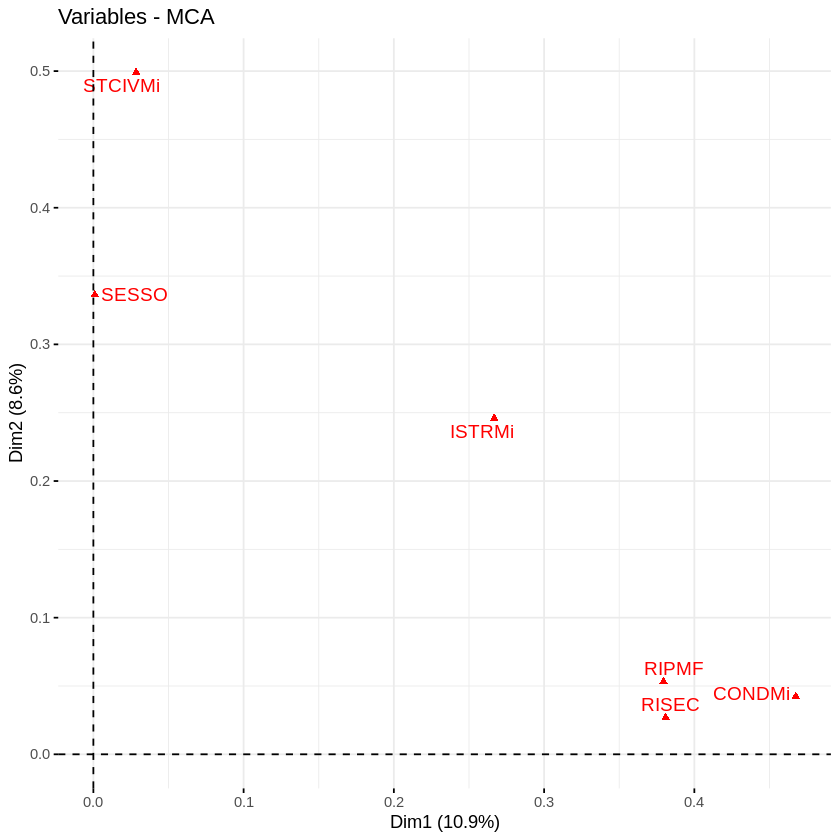

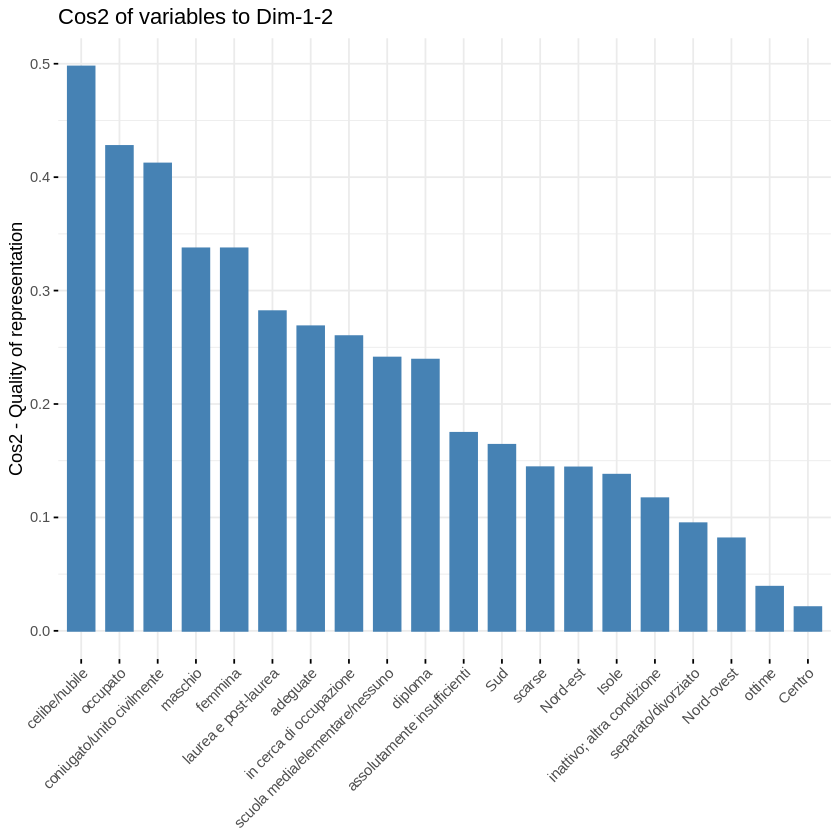

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]


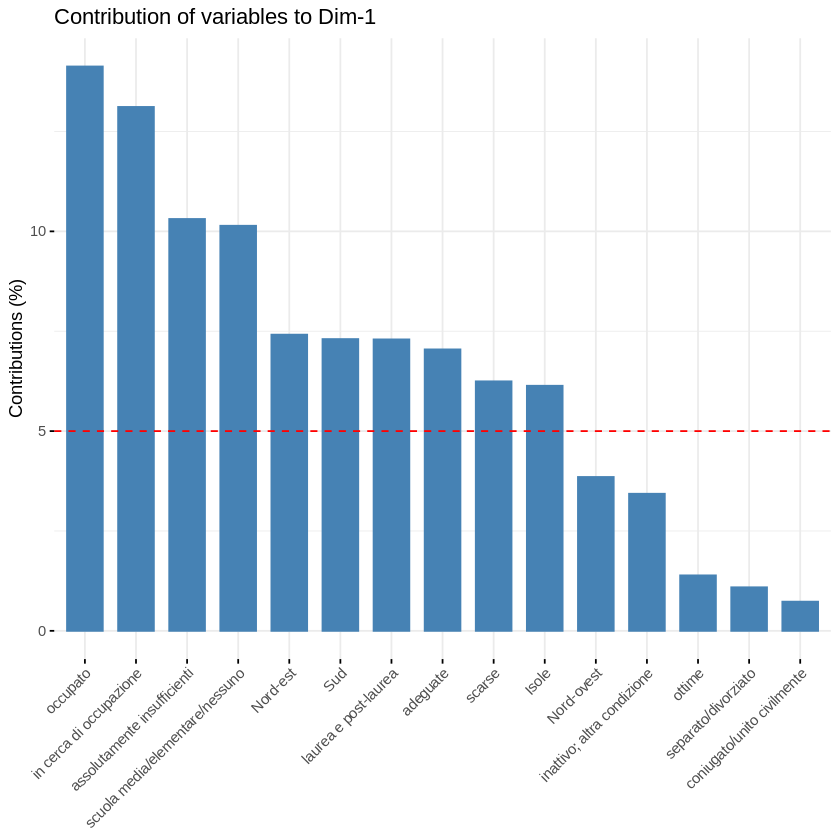

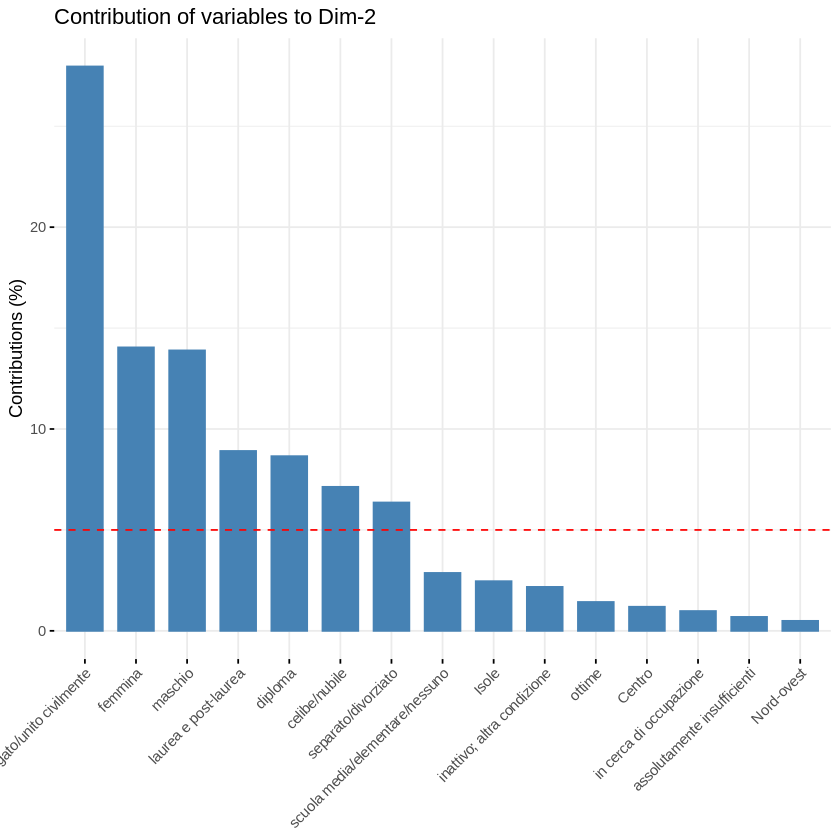

In [ ]:
ggmca(AVQ18.sport[,c('SESSO','STCIVMi','ISTRMi','CONDMi','RISEC', 'RIPMF')],"MCA plot of variables using R package FactoMineR",moreinfo=T)

In [ ]:
# GRAFICI AGGIUNTIVI ... ggmca(df,"Titolo",moreinfo=T)
# [x] percentuale di varianza spiegata per dimensione ... permette di capire la percentuale spiegata dalle dimensioni
# [x] correlazione variabili con le dmensioni ... permette di individuare quali variabili sono maggiormente correlate con ogni dimensione
# [x] cos2 delle variabili con dim 1-2 .... se determinate variabili non sono molto rappresnetate nelle due dimensioni si possono fare meno consideraizoni su di esse
# [x] grafico contribuzione singole variabili a dimensione 1 o 2